<div style="text-align: center">


# <center>**The Chamber of deputies**</center>

Welcome to **<a href="https://giorgimariachiara.github.io/COD/index.html">The Chamber of Deputies</a>** project, dedicated to the analysis of the <b> status of women in Italian politics</b>. Our project aims to shed light on the representation of women in the Italian political landscape, particularly within the Chamber of Deputies.<br>
This Jupyter Notebook is intended to provide readers with a data documentation of the project that combined with the **<a href="https://giorgimariachiara.github.io/COD/index.html">website</a>** will provide the full overview of the work. Each query title is also a link to the website specific page.

---

At the heart of our project lies the rich resource of open data provided by the **[dati.camera.it](https://dati.camera.it/it/)** database, maintained by the Italian Chamber of Deputies. <br>
The dati.camera.it database serves as a fundamental pillar for our data analysis efforts, providing comprehensive and structured information about parliamentary activities, deputies, laws, sessions, and more. This valuable dataset, being an example of Linked Open Data, adheres to semantic web standards, allowing for interconnectedness and interoperability. <br>
To ensure a comprehensive analysis, we complement the dati.camera.it data by leveraging additional information from other sources. When specific details are missing, we turn to **[Wikidata](https://www.wikidata.org/wiki/Wikidata:Main_Page)**, a free open knowledge base, or perform web scraping techniques, such as **HTML analysis of Wikipedia pages**, to gather the required data. These practices enable us to enrich our dataset and provide a more comprehensive picture of the political landscape.

<br>

---

<br>


## **[QUERY 1](https://giorgimariachiara.github.io/COD/p1.html)**- How many deputies have been present in the Champer of Deputies? How many of them are female and how many men?

The provided code demonstrates an approach to gather data from the dati.camera.it database using SPARQL queries. The purpose is to extract information regarding the total number of women and men serving as deputies in the Chamber of Deputies.

The first step is to install the <b>libraries</b> that will be necessary for all the subsequent work. These libraries enable us to query the dati.camera.it database, process the retrieved data, and create later the necessary charts.

Next, the code sets the <b> SPARQL endpoint URL </b> for the dati.camera.it database and adjusts the display option of pandas to show all rows in the output.

The code then presents two separate SPARQL queries. The first query, <b>totale_donne </b>, retrieves distinct information about female deputies. It includes their full name, date of birth, and place of birth. The query is executed using sparql_dataframe.get(), which retrieves the results as a DataFrame. The DataFrame, df_totale_donne, is then filtered to include only the relevant columns.

Similarly, the second query, <b>totale_uomini</b>, retrieves distinct information about male deputies following the same structure as the previous query. The results are stored in the df_totale_uomini DataFrame after filtering.
In these queries, as well as in the next both ?d(deputy) and ?persona is necessary because ?d represents a URI (Uniform Resource Identifier) for a deputy, and it can repeat across different legislatures.

To combine the data for both women and men, the code uses pd.concat() to concatenate the df_totale_uomini and df_totale_donne DataFrames. This merging operation creates a single DataFrame, <b>df_totale</b>, that encompasses the total information about deputies.

In each query we consider the data of birth of the deputates so as to avoid potential inaccuracies that may arise from individuals sharing the same name.

Additionally, with df_totale.to_csv(), it exports the DataFrame to a CSV file that will be later used for the chart creation.

</div>

In [10]:
# Installa pandas
!pip install pandas

# Installa sparqlwrapper
!pip install sparqlwrapper

!pip install SPARQLWrapper
!pip install sparql_dataframe

!pip install geopy
!pip install folium

!pip install fuzzywuzzy

!pip install wikipedia-api
!pip install requests
!pip install beautifulsoup4

!pip install python-dateutil
!pip install wikidataintegrator
!pip install ratelimit

!pip install dash

In [11]:
from SPARQLWrapper import JSON
from sparql_dataframe import sparql_dataframe
import pandas as pd
from sparql_dataframe import get
import requests

endpoint = "https://dati.camera.it/sparql"
pd.set_option('display.max_rows', None)

#QUERY NUMERO TOTALE DONNE

totale_donne = """
SELECT DISTINCT ?persona ?cognome ?nome
?dataNascita ?luogoNascita "female" as ?gender
WHERE {
?persona ocd:rif_mandatoCamera ?mandato; a foaf:Person.

?d a ocd:deputato;
ocd:rif_leg ?legislatura;
ocd:rif_mandatoCamera ?mandato.
OPTIONAL{?d dc:description ?info}

##anagrafica
?d foaf:surname ?cognome; foaf:gender "female" ;foaf:firstName ?nome.
OPTIONAL{
?persona <http://purl.org/vocab/bio/0.1/Birth> ?nascita.
?nascita <http://purl.org/vocab/bio/0.1/date> ?dataNascita;
rdfs:label ?nato; ocd:rif_luogo ?luogoNascitaUri.
?luogoNascitaUri dc:title ?luogoNascita.
}}"""
df_totale_donne = get(endpoint, totale_donne)
df_totale_donne = df_totale_donne[['nome', 'cognome', 'gender']]

#QUERY NUMERO TOTALE UOMINI
totale_uomini = """
SELECT DISTINCT ?persona ?cognome ?nome
?dataNascita ?luogoNascita "male" as ?gender
WHERE {
?persona ocd:rif_mandatoCamera ?mandato; a foaf:Person.

?d a ocd:deputato;
ocd:rif_leg ?legislatura;
ocd:rif_mandatoCamera ?mandato.
OPTIONAL{?d dc:description ?info}

##anagrafica
?d foaf:surname ?cognome; foaf:gender "male" ;foaf:firstName ?nome.
OPTIONAL{
?persona <http://purl.org/vocab/bio/0.1/Birth> ?nascita.
?nascita <http://purl.org/vocab/bio/0.1/date> ?dataNascita;
rdfs:label ?nato; ocd:rif_luogo ?luogoNascitaUri.
?luogoNascitaUri dc:title ?luogoNascita.
}}"""
df_totale_uomini = get(endpoint, totale_uomini)
df_totale_uomini = df_totale_uomini[['nome', 'cognome', 'gender']]

df_totale = pd.concat([df_totale_uomini, df_totale_donne])
df_totale.to_csv("totaledeputati.csv",  index=False, index_label=False)
print(df_totale)

                              nome                            cognome  gender
0                           MATTEO                           RESCIGNO    male
1                            PAOLO                             BONOMI    male
2                            MARIO                              RICCI    male
3                          ACHILLE                          RIGAMONTI    male
4                         GIUSEPPE                               RIVA    male
5                           ERCOLE                          ROCCHETTI    male
6                          CESARIO                               RODI    male
7                           ARTURO                            ROGNONI    male
8                         GIUSEPPE                           ROMANATO    male
9                       BARTOLOMEO                             ROMANO    male
10                      GIANFRANCO                           ALIVERTI    male
11                           PAOLO                              

The collected data has been transformed into a meaningful visualization using the Python programming language, specifically leveraging the pandas library for data manipulation and matplotlib for visualization. We've chosen a <b>bar chart</b> to represent the data, as it's particularly useful in displaying categorical data. The bar chart enables clear and easy comparisons, facilitating the visualization of the frequency or count of deputies in each gender category. Its <b>straightforward design</b> allows for easy interpretation, making it particularly effective when the primary focus is on comparing data points rather than showing trends over time.  This visualization approach enhances the accessibility and comprehension of the gender distribution within the legislative body, aiding in the assessment of gender representation in a <b>formal</b> and <b>informative</b> manner.

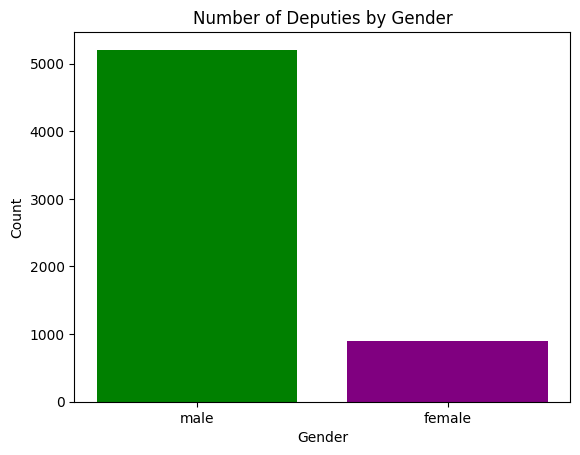

In [12]:
# bar chart totale deputati maschi e femmine presenti in generale nella camera
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('totaledeputati.csv')

gender_counts = df['gender'].value_counts()

colors = ['green', 'purple']

plt.bar(gender_counts.index, gender_counts.values, color=colors)

# Set the chart title and labels
plt.title('Number of Deputies by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the chart
plt.show()



## **<a href="https://giorgimariachiara.github.io/COD/p1.html">QUERY 1.2</a>** - How many deputies have been present in the Champer of Deputies in every legislature?

The second part of the query aims to analyze <b>the representation of men and women in the Italian Chamber of Deputies across different legislatures</b>.

The code retrieves data on women and men serving in the Italian Chamber of Deputies for each legislature. It creates separate dataframes for female and male deputies, indicating their names, genders, and the legislature they served in. The data is then combined to obtain a dataframe containing information on all deputies for each legislature.


In [13]:
pd.set_option('display.max_columns', None)
endpoint = "https://dati.camera.it/sparql"

#DONNE PER OGNI LEGISLATURA
totale_donne_per_legislatura = """
SELECT DISTINCT ?persona ?cognome ?nome ?dataNascita ?luogoNascita "female" as ?gender ?legislatura
WHERE {
?persona ocd:rif_mandatoCamera ?mandato; a foaf:Person.

?d a ocd:deputato;
ocd:rif_leg ?legislatura;
ocd:rif_mandatoCamera ?mandato.
OPTIONAL{?d dc:description ?info}

##anagrafica
?d foaf:surname ?cognome; foaf:gender "female" ;foaf:firstName ?nome.
OPTIONAL{
?persona <http://purl.org/vocab/bio/0.1/Birth> ?nascita.
?nascita <http://purl.org/vocab/bio/0.1/date> ?dataNascita;
rdfs:label ?nato; ocd:rif_luogo ?luogoNascitaUri.
?luogoNascitaUri dc:title ?luogoNascita.
}}"""
df_totale_donne_per_legislatura = get(endpoint, totale_donne_per_legislatura)
df_totale_donne_per_legislatura = df_totale_donne_per_legislatura[['nome', 'cognome', 'gender', 'legislatura']]

df_totale_donne_per_legislatura.to_csv("donneperlegislatura.csv",  index=False, index_label=False)

#QUERY UOMINI PER LEGISLATURA DA 0 A 10
query_uomini1 = """
SELECT DISTINCT ?d ?nome ?cognome ?legislatura "male" as ?gender
WHERE {
  ?d a ocd:deputato;
    ocd:rif_leg ?legislatura;
    ocd:rif_mandatoCamera ?mandato.
  OPTIONAL { ?d dc:description ?info }
  ?d foaf:surname ?cognome;
    foaf:gender "male";
    foaf:firstName ?nome.
  OPTIONAL {
    ?persona <http://purl.org/vocab/bio/0.1/Birth> ?nascita;
      <http://purl.org/vocab/bio/0.1/date> ?dataNascita;
      rdfs:label ?nato;
      ocd:rif_luogo ?luogoNascitaUri.
    ?luogoNascitaUri dc:title ?luogoNascita.
  }
  FILTER (?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/costituente> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_01> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_02> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_03> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_04> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_05> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_06> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_07> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_08> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_09> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_10>)
}


"""
dfmale_legislature1 = get(endpoint, query_uomini1)

#QUERY UOMINI LEGISLATURA DA 11 A 19
query_uomini2 = """
SELECT DISTINCT ?d ?nome ?cognome ?legislatura "male" as ?gender
WHERE {
  ?d a ocd:deputato;
    ocd:rif_leg ?legislatura;
    ocd:rif_mandatoCamera ?mandato.
  OPTIONAL { ?d dc:description ?info }
  ?d foaf:surname ?cognome;
    foaf:gender "male";
    foaf:firstName ?nome.
  OPTIONAL {
    ?persona <http://purl.org/vocab/bio/0.1/Birth> ?nascita;
      <http://purl.org/vocab/bio/0.1/date> ?dataNascita;
      rdfs:label ?nato;
      ocd:rif_luogo ?luogoNascitaUri.
    ?luogoNascitaUri dc:title ?luogoNascita.
  }
  FILTER (
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_11> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_12> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_13> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_14> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_15> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_16> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_17> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_18> ||
          ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_19>
  )
}

"""

dfmale_legislature2 = get(endpoint, query_uomini2)

df_totale_uomini_per_legislatura = pd.concat([dfmale_legislature1, dfmale_legislature2])
df_totale_uomini_per_legislatura.to_csv("uominiperlegislatura.csv",  index=False, index_label=False)

df_totale_deputati_per_legislatura = pd.concat([df_totale_uomini_per_legislatura, df_totale_donne_per_legislatura])
df_totale_deputati_per_legislatura = df_totale_deputati_per_legislatura[["nome", "cognome", "gender", "legislatura"]]
df_totale_deputati_per_legislatura.to_csv("totaledeputatiperlegislatura.csv",  index=False, index_label=False)
#print(df_totale_deputati_per_legislatura)

After retrieving and organizing the data on the number of deputies per gender for each legislature, the information was transformed into a visual representation using a <b>stacked bar chart</b>. The Python code utilizes two libraries: pandas for data manipulation and matplotlib for data visualization.

In this code, pandas is employed to read the data from the CSV file 'totaledeputatiperlegislatura.csv' and to perform groupings to calculate the total number of deputies per gender for each legislature.

On the other hand, the pyplot module from matplotlib is used to create a stacked bar chart that represents the distribution of male and female deputies across different legislatures.

The code begins by reading the data from the CSV file into a pandas DataFrame named 'data.' It then proceeds to calculate the total number of deputies per gender for each legislature using the groupby() and size() functions, resulting in the 'gender_legislature_counts' DataFrame.

To create the stacked bar chart, the code utilizes the plot() function with the 'kind' parameter set to 'bar' to specify the chart type. The 'stacked' parameter is set to True, enabling the creation of a stacked representation of the bars. Additionally, custom colors are specified for the male and female segments of the bars using the 'color' parameter.

To improve the chart's readability, the code modifies the x-axis labels to display custom legislature labels using the set_xticklabels() function. Furthermore, the 'plt.xlabel()', 'plt.ylabel()', and 'plt.title()' functions are used to add labels to the axes and a title to the chart.

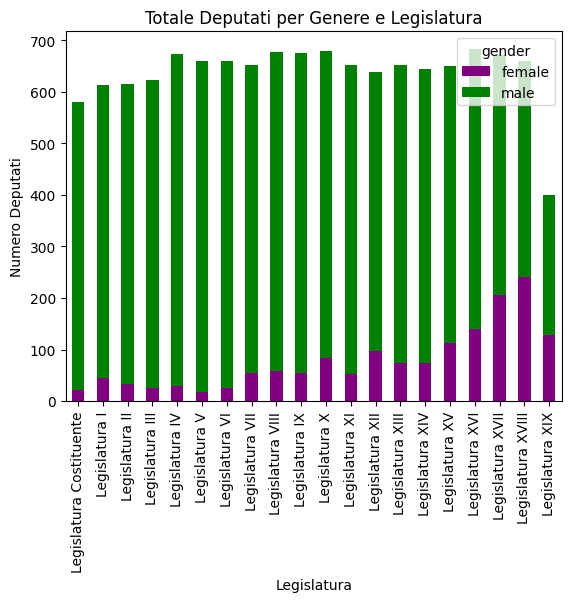

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica i dati dal file CSV
data = pd.read_csv('totaledeputatiperlegislatura.csv')

# Calcola il totale dei deputati per genere e legislatura
gender_legislature_counts = data.groupby(['legislatura', 'gender']).size().unstack()

# Crea la bar chart con colori specifici per genere
ax = gender_legislature_counts.plot(kind='bar', stacked=True, color=['purple', 'green'])

# Aggiungi etichette
plt.xlabel('Legislatura')
plt.ylabel('Numero Deputati')
plt.title('Totale Deputati per Genere e Legislatura')

# Modifica le etichette delle legislature
legislature_labels = ['Legislatura Costituente', 'Legislatura I', 'Legislatura II', 'Legislatura III', 'Legislatura IV', 'Legislatura V', 'Legislatura VI', 'Legislatura VII', 'Legislatura VIII', 'Legislatura IX', 'Legislatura X', 'Legislatura XI', 'Legislatura XII', 'Legislatura XIII', 'Legislatura XIV', 'Legislatura XV', 'Legislatura XVI', 'Legislatura XVII', 'Legislatura XVIII', 'Legislatura XIX']  # Lista delle etichette desiderate
ax.set_xticklabels(legislature_labels)

# Mostra la chart
plt.show()



## **<a href="https://giorgimariachiara.github.io/COD/p2.html">QUERY 2</a>** - What is the geographical distribution of male and female deputies?

The second query focuses on conducting a comprehensive analysis of the <b>geographical distribution</b> of male and female deputies within the Italian Chamber of Deputies.

The query commences by retrieving distinct information about male deputies, encompassing their names, surnames, birthplaces, and the respective regions. Employing a similar structure as in previous queries, it selectively filters for male deputies and extracts the pertinent information. The data acquired through this process is then organized into the DataFrame df_uomini_nascita.

Similarly, the query proceeds to focus on female deputies, extracting analogous information such as names, surnames, birthplaces, and regions. This data is stored within the DataFrame df_donne_nascita.

To facilitate an insightful geographical visualization, the code refactors the column "luogoNascita" to "città" (city) for both DataFrames. Moreover, it selectively retains only the "città" (city) and "regione" (region) columns, eliminating any extraneous information.

The resulting DataFrames, df_uomini_nascita and df_donne_nascita, respectively contain the birth cities and regions of male and female deputies. These DataFrames are subsequently exported to CSV files, denoted as "uominimappa.csv" and "donnemappa.csv," facilitating further analysis and visualization.

In [15]:
from sparql_dataframe import get
endpoint = "https://dati.camera.it/sparql"

#QUERY PER CITTÀ NASCITA
uomini_nascita = """
SELECT DISTINCT ?persona ?cognome ?nome ?luogoNascita ?regione
WHERE {
?persona ocd:rif_mandatoCamera ?mandato; a foaf:Person.

?d a ocd:deputato;
ocd:rif_leg ?legislatura;
ocd:rif_mandatoCamera ?mandato.
OPTIONAL{?d dc:description ?info}

##anagrafica
?d foaf:surname ?cognome; foaf:gender "male" ;foaf:firstName ?nome.
OPTIONAL{
?persona <http://purl.org/vocab/bio/0.1/Birth> ?nascita.
?nascita <http://purl.org/vocab/bio/0.1/date> ?dataNascita;
rdfs:label ?nato; ocd:rif_luogo ?luogoNascitaUri.
?luogoNascitaUri dc:title ?luogoNascita.
?luogoNascitaUri ocd:parentADM3 ?regione.
}}"""

df_uomini_nascita = get(endpoint, uomini_nascita)
df_uomini_nascita.rename(columns={"luogoNascita": "città"}, inplace=True)
df_uomini_nascita = df_uomini_nascita[["città", "regione"]]
#print(len(df_uomini_nascita))
df_uomini_nascita.to_csv("uominimappa.csv",  index=False, index_label=False)

#QUERY PER CITTÀ NASCITA
donne_nascita = """
SELECT DISTINCT ?persona ?cognome ?nome ?luogoNascita ?regione
WHERE {
?persona ocd:rif_mandatoCamera ?mandato; a foaf:Person.

?d a ocd:deputato;
ocd:rif_leg ?legislatura;
ocd:rif_mandatoCamera ?mandato.
OPTIONAL{?d dc:description ?info}

##anagrafica
?d foaf:surname ?cognome; foaf:gender "female" ;foaf:firstName ?nome.
OPTIONAL{
?persona <http://purl.org/vocab/bio/0.1/Birth> ?nascita.
?nascita <http://purl.org/vocab/bio/0.1/date> ?dataNascita;
rdfs:label ?nato; ocd:rif_luogo ?luogoNascitaUri.
?luogoNascitaUri dc:title ?luogoNascita.
?luogoNascitaUri ocd:parentADM3 ?regione.
}}"""

df_donne_nascita = get(endpoint, donne_nascita)
df_donne_nascita.rename(columns={"luogoNascita": "città"}, inplace=True)
df_donne_nascita = df_donne_nascita[["città", "regione"]]
df_donne_nascita.to_csv("donnemappa.csv",  index=False, index_label=False)
#print(df_donne_nascita)

Upon obtaining the relevant data, a compelling <b>map visualization</b> was crafted to explore the geographical distribution of male and female deputies within the Italian Chamber of Deputies.

This geographical visualization encapsulates a multitude of advantages. Foremost, the map offers an intuitive and succinct presentation of the spatial intricacies present in the dataset. The strategic placement of birthplace markers on the map unveils at a glance the concentration of deputies across different regions of Italy, empowering a swift grasp of the regional representation of both genders.

Furthermore, the map's interactive nature elevates the data exploration experience, fostering a deeper and more insightful investigation. The dynamic functionalities, encompassing features like zooming and panning, empower users to focus on specific regions of interest, enabling a thorough examination of the data. To maintain visual clarity, the employment of MarkerClusters effectively organizes nearby markers, avoiding visual clutter and ensuring an aesthetically pleasing and navigable map interface.

Notably, the strategic differentiation of markers by region, distinguished through diverse icons on the map, adds an additional layer of information.

- NORTH REGIONS: cloud; <br>
- CENTRE REGIONS: leaf; <br>
- SOUTH REGIONS: star; <br>

For all regions the color changes based on the number of people born in a specific city. The algorithm is the following:  color = 'red' if count > 30 else 'green' if count > 15 else 'blue' if count > 5 else 'black'.

To create the map visualization, the Python libraries <b>'geopy'</b>, <b>'folium'</b>, <b>'pandas'</b>, and others were utilized. The 'geopy' library was employed to geocode the city locations based on their names, obtaining latitude and longitude coordinates. 'Folium' facilitated the creation of the interactive map with customizable markers and clusters. 'Pandas' was utilized for data manipulation and handling, enabling the integration of geographic data with the DataFrame containing information about male and female deputies.

In [ ]:
from geopy.geocoders import Nominatim
import folium
import pandas as pd
from IPython.display import IFrame
from geopy.exc import GeocoderTimedOut
from IPython.display import display
from IPython.display import HTML
from functools import lru_cache
from folium.plugins import MarkerCluster

# Create an LRUCache class
class LRUCache:
    def __init__(self, maxsize):
        self.maxsize = maxsize
        self.cache = {}

    def __getitem__(self, key):
        if key in self.cache:
            value = self.cache.pop(key)
            self.cache[key] = value  # Move the item to the end to mark it as most recently used
            return value

    def __setitem__(self, key, value):
        if key in self.cache:
            self.cache.pop(key)
        elif len(self.cache) >= self.maxsize:
            self.cache.pop(next(iter(self.cache)))  # Remove the least recently used item
        self.cache[key] = value

# Create a function to geocode with a timeout feature and cache the results
@lru_cache(maxsize=1000)
def geocode_with_cache(loc, query, timeout=5, max_retries=3):
    retries = 0
    while retries < max_retries:
        try:
            return loc.geocode(query, timeout=timeout)
        except GeocoderTimedOut:
            retries += 1
    return None

# Read the CSV file
df = pd.read_csv('donnemappa.csv')

# Create a dictionary to map region to icon color
icon_dict = {'Nord': 'blue', 'Centro': 'green', 'Sud': 'red'}
region_dict = {
    'PIEMONTE': 'Nord',
    'VALLE D\'AOSTA': 'Nord',
    'LOMBARDIA': 'Nord',
    'TRENTINO ALTO-ADIGE': 'Nord',
    'VENETO': 'Nord',
    'FRIULI-VENEZIA-GIULIA': 'Nord',
    'LIGURIA': 'Nord',
    'EMILIA-ROMAGNA': 'Nord',
    'TOSCANA': 'Centro',
    'UMBRIA': 'Centro',
    'MARCHE': 'Centro',
    'LAZIO': 'Centro',
    'ABRUZZO': 'Sud',
    'MOLISE': 'Sud',
    'CAMPANIA': 'Sud',
    'PUGLIA': 'Sud',
    'BASILICATA': 'Sud',
    'CALABRIA': 'Sud',
    'SICILIA': 'Sud',
    'SARDEGNA': 'Sud'
}

# Calculate the city counts
city_counts_dict = df['città'].value_counts().to_dict()

# Calling the Nominatim tool
geolocator = Nominatim(user_agent='mariachiara.giorgi1@gmail.com')

# Create empty lists to store latitude, longitude, and region
lat = []
lon = []
regione = []

# Create a cache with a max size of 1000
geocode_cache = LRUCache(maxsize=1000)

# Create a dictionary to store the geocoded locations
geocoded_locations = {}

# Iterate over the DataFrame to geocode the cities and get the coordinates
for index, row in df.iterrows():
    city = row['città']
    if city in geocoded_locations:
        getLoc = geocoded_locations[city]
    else:
        getLoc = geocode_with_cache(geolocator, city)
        geocoded_locations[city] = getLoc

    if getLoc is not None:
        lat.append(getLoc.latitude)
        lon.append(getLoc.longitude)
        regione.append(row['regione'])
    else:
        print(f"No coordinates found for city {city} in row {index}")
        lat.append(None)
        lon.append(None)
        regione.append(None)

# Create a DataFrame to store the coordinates and region
df_cord = pd.concat([pd.Series(lat, name='lat'), pd.Series(lon, name='lon'), pd.Series(regione, name='regione')], axis=1)
df['lat'] = lat
df['lon'] = lon

# Create a folium map
m = folium.Map(df_cord[['lat', 'lon']].mean().values.tolist(), zoom_start=5)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(m)

# Initialize a dictionary to store city markers
city_markers = {}

for index, row in df.iterrows():
    city = row['città']
    if pd.isna(city):
        continue  # Skip the iteration if city is NaN

    lat = row['lat']
    lon = row['lon']
    if pd.isna(lat) or pd.isna(lon):
        continue  # Skip the iteration if lat or lon is NaN

    count = city_counts_dict.get(city, 0)  # Use dictionary.get() to handle missing keys
    color = 'red' if count > 30 else 'green' if count > 15 else 'blue' if count > 5 else 'black'

    regione = row['regione']
    if pd.notna(regione):
        if region_dict[regione] == 'Nord':
            marker_icon = folium.Icon(icon='cloud', color=color)
        elif region_dict[regione] == 'Centro':
            marker_icon = folium.Icon(icon='leaf', color=color)
        else:
            marker_icon = folium.Icon(icon='star', color=color)

        # Check if the city marker already exists
        if city in city_markers:
            # Update the count on the existing marker
            existing_marker = city_markers[city]
            existing_popup = existing_marker.options.get('popup')
            if existing_popup is not None:
                existing_count = existing_popup.split(":")[1].strip()
                new_count = int(existing_count) + count
                existing_marker.options['popup'] = f"{city}: {new_count}"
        else:
            # Create a new marker for the city
            marker = folium.Marker(
                location=[lat, lon],
                icon=marker_icon,
                popup=f"{city}: {count}",
                tooltip=city
            )
            # Add the marker to the city_markers dictionary
            city_markers[city] = marker
            marker.add_to(marker_cluster)
    else:
        # Handle missing regione value
        # You can choose to skip or add a default marker/icon here
        pass

# Add the marker cluster to the map
marker_cluster.add_to(m)

# Fit the map bounds and save it to an HTML file
sw = df_cord[['lat', 'lon']].min().values.tolist()
ne = df_cord[['lat', 'lon']].max().values.tolist()
m.fit_bounds([sw, ne])
m.save('map.html')

from google.colab import files
files.download('map.html')


from IPython.display import HTML
HTML('<script src="https://cdnjs.cloudflare.com/ajax/libs/iframe-resizer/4.2.11/iframeResizer.min.js"></script>')

# Display the map in a Jupyter notebook using an IFrame
display(IFrame(src='map.html', width=800, height=500))



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from geopy.geocoders import Nominatim
import folium
import pandas as pd
from IPython.display import IFrame
from geopy.exc import GeocoderTimedOut
from IPython.display import display
from IPython.display import HTML
from functools import lru_cache
from folium.plugins import MarkerCluster

# Create an LRUCache class
class LRUCache:
    def __init__(self, maxsize):
        self.maxsize = maxsize
        self.cache = {}

    def __getitem__(self, key):
        if key in self.cache:
            value = self.cache.pop(key)
            self.cache[key] = value  # Move the item to the end to mark it as most recently used
            return value

    def __setitem__(self, key, value):
        if key in self.cache:
            self.cache.pop(key)
        elif len(self.cache) >= self.maxsize:
            self.cache.pop(next(iter(self.cache)))  # Remove the least recently used item
        self.cache[key] = value

# Create a function to geocode with a timeout feature and cache the results
@lru_cache(maxsize=1000)
def geocode_with_cache(loc, query, timeout=5, max_retries=3):
    retries = 0
    while retries < max_retries:
        try:
            return loc.geocode(query, timeout=timeout)
        except GeocoderTimedOut:
            retries += 1
    return None

# Read the CSV file
df = pd.read_csv('uominimappa.csv')

# Create a dictionary to map region to icon color
icon_dict = {'Nord': 'blue', 'Centro': 'green', 'Sud': 'red'}
region_dict = {
    'PIEMONTE': 'Nord',
    'VALLE D\'AOSTA': 'Nord',
    'LOMBARDIA': 'Nord',
    'TRENTINO ALTO-ADIGE': 'Nord',
    'VENETO': 'Nord',
    'FRIULI-VENEZIA-GIULIA': 'Nord',
    'LIGURIA': 'Nord',
    'EMILIA-ROMAGNA': 'Nord',
    'TOSCANA': 'Centro',
    'UMBRIA': 'Centro',
    'MARCHE': 'Centro',
    'LAZIO': 'Centro',
    'ABRUZZO': 'Sud',
    'MOLISE': 'Sud',
    'CAMPANIA': 'Sud',
    'PUGLIA': 'Sud',
    'BASILICATA': 'Sud',
    'CALABRIA': 'Sud',
    'SICILIA': 'Sud',
    'SARDEGNA': 'Sud'
}

# Calculate the city counts
city_counts_dict = df['città'].value_counts().to_dict()

# Calling the Nominatim tool
geolocator = Nominatim(user_agent='mariachiara.giorgi1@gmail.com')

# Create empty lists to store latitude, longitude, and region
lat = []
lon = []
regione = []

# Create a cache with a max size of 1000
geocode_cache = LRUCache(maxsize=1000)

# Create a dictionary to store the geocoded locations
geocoded_locations = {}

# Iterate over the DataFrame to geocode the cities and get the coordinates
for index, row in df.iterrows():
    city = row['città']
    if city in geocoded_locations:
        getLoc = geocoded_locations[city]
    else:
        getLoc = geocode_with_cache(geolocator, city)
        geocoded_locations[city] = getLoc

    if getLoc is not None:
        lat.append(getLoc.latitude)
        lon.append(getLoc.longitude)
        regione.append(row['regione'])
    else:
        print(f"No coordinates found for city {city} in row {index}")
        lat.append(None)
        lon.append(None)
        regione.append(None)

# Create a DataFrame to store the coordinates and region
df_cord = pd.concat([pd.Series(lat, name='lat'), pd.Series(lon, name='lon'), pd.Series(regione, name='regione')], axis=1)
df['lat'] = lat
df['lon'] = lon

# Create a folium map
m = folium.Map(df_cord[['lat', 'lon']].mean().values.tolist(), zoom_start=5)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(m)

# Initialize a dictionary to store city markers
city_markers = {}

for index, row in df.iterrows():
    city = row['città']
    if pd.isna(city):
        continue  # Skip the iteration if city is NaN

    lat = row['lat']
    lon = row['lon']
    if pd.isna(lat) or pd.isna(lon):
        continue  # Skip the iteration if lat or lon is NaN

    count = city_counts_dict.get(city, 0)  # Use dictionary.get() to handle missing keys
    color = 'red' if count > 30 else 'green' if count > 15 else 'blue' if count > 5 else 'black'

    regione = row['regione']
    if pd.notna(regione):
        if region_dict[regione] == 'Nord':
            marker_icon = folium.Icon(icon='cloud', color=color)
        elif region_dict[regione] == 'Centro':
            marker_icon = folium.Icon(icon='leaf', color=color)
        else:
            marker_icon = folium.Icon(icon='star', color=color)

        # Check if the city marker already exists
        if city in city_markers:
            # Update the count on the existing marker
            existing_marker = city_markers[city]
            existing_popup = existing_marker.options.get('popup')
            if existing_popup is not None:
                existing_count = existing_popup.split(":")[1].strip()
                new_count = int(existing_count) + count
                existing_marker.options['popup'] = f"{city}: {new_count}"
        else:
            # Create a new marker for the city
            marker = folium.Marker(
                location=[lat, lon],
                icon=marker_icon,
                popup=f"{city}: {count}",
                tooltip=city
            )
            # Add the marker to the city_markers dictionary
            city_markers[city] = marker
            marker.add_to(marker_cluster)
    else:
        # Handle missing regione value
        # You can choose to skip or add a default marker/icon here
        pass

# Add the marker cluster to the map
marker_cluster.add_to(m)

# Fit the map bounds and save it to an HTML file
sw = df_cord[['lat', 'lon']].min().values.tolist()
ne = df_cord[['lat', 'lon']].max().values.tolist()
m.fit_bounds([sw, ne])
m.save('mapuomini.html')

from google.colab import files
files.download('mapuomini.html')


from IPython.display import HTML
HTML('<script src="https://cdnjs.cloudflare.com/ajax/libs/iframe-resizer/4.2.11/iframeResizer.min.js"></script>')

# Display the map in a Jupyter notebook using an IFrame
display(IFrame(src='mapuomini.html', width=800, height=500))

FileNotFoundError: ignored

## **<a href="https://giorgimariachiara.github.io/COD/p3.html">QUERY 3</a>** - How many of the deputies, both male and female, have attained a higher education degree?

In the third query, the analysis revolves around the <b>educational attainment</b> of the deputies. Due to the extensive nature of the codes, they are categorized separately for men and women. <b>The primary hypothesis we aim to substantiate is the disparity between the requirements for female representatives in the Chamber of Deputies, who are expected to hold at least a bachelor's degree, and their male counterparts.</b>

Within the "camera dati" database, pertinent information regarding an individual's educational background can be found within the "dc:description" property. Initially, a query is executed to retrieve the "dc:description" for each deputy, including cases where the information is absent. Subsequently, duplicate entries are removed based on distinct values within the "persona," "nome," "cognome," and "datadinascita" columns. It should be noted that despite the utilization of the "distinct" keyword during the query, duplications may occur due to the presence of similar yet differently formatted information within the "?info" section for different deputies across various legislative periods.

The subsequent step involves extracting rows and deputies lacking description information, enabling further investigation by seeking alternative sources. In our pursuit, we explored other accessible online databases and identified Wikipedia as a viable option for retrieving the desired educational information. Employing web scraping techniques, we formatted the names of deputies without information to hypothesize their corresponding Wikipedia pages. It's noteworthy that Wikipedia pages typically adhere to the following format: "https://it.wikipedia.org/wiki/FirstName_LastName," with names in our dataframe consistently represented in uppercase.

In the provided code, a formatting adjustment was applied to the birth date information.
The original format for the birth date was "YYYYMMDD," which uses the year, month, and day as numerical values. However, when extracting Wikipedia pages or performing web scraping to gather additional information about deputies, it is important to verify that the information pertains to the correct person and not an homonym.

To achieve this, the birth date format was revised to represent the date as a string in the form "day month year" (e.g., "23 January 1928"). This modified format corresponds to the way birth dates are commonly presented on Wikipedia pages, where the month is written as a word and the year is in full numerical value.

Preceding the search process for deputies lacking description information, two distinct dataframes, namely "laureate" (graduated) and "nonlaureate" (not graduated), were created. The "laureate" dataframe encompasses rows containing variations of the word "laurea" and "master" within the "info" section, denoting individuals with recognized degrees. Conversely, the remaining rows were classified as "nonlaureate," indicating those without documented educational qualifications.

To conclude, a final dataframe, "df_donne_laureate," was generated to consolidate the formatted names and surnames under the unified "Persona" column. This compilation was facilitated by implementing the "capitalize_name" function. The same procedure was employed to process the "nonlaureate" dataframe.

Following this, the research process begins. The initial step entails creating Wikipedia URLs by appending the formatted names and surnames to the base URL. These URLs are subsequently verified for existence using the "check_url_exists(url)" function. As a result, two distinct lists are generated: one comprising the located URLs and another containing those that could not be found. Additionally, the code incorporates the "extract_birth_date" function, facilitating the extraction of birth dates and their subsequent validation. Consequently, the URLs contained within the "donne_con_url" dataframe offer certainty regarding their accuracy.

A subsequent verification is conducted for the "donne_senza_url" dataframe, addressing specific scenarios. This includes individuals born on the first day of the month, which necessitates a distinct birth date formatting. Furthermore, for deceased deputies, their Wikipedia page formatting may contain two dates within the section where we extract the birth date. As a result, extra caution and meticulousness are required during the extraction process. To enhance clarity and ensure the accurate execution of operations, the code has been divided into well-defined sections.

To ensure comprehensive coverage of all URLs, an additional step is taken to search for the "url_politico" format, which some politicians follow, such as: https://it.wikipedia.org/wiki/Francesco_Nerli_(politico). As a result, two distinct dataframes, namely <b>"df_with_url"</b> and <b>"df_without_url"</b> are generated. Moreover, for individuals without a found URL, further processing is applied to their names. It is possible that these individuals possess URLs with additional names or variations not present in the "camera dati" database. To address this, the function "get_alternative_urls" is employed, which searches Wikipedia using the provided name and surname, and analyzes the results to identify potential corresponding Wikipedia pages. It should be noted that URLs with only the name or only the surname are also considered. Subsequently, an additional verification is performed to ensure that the name and surname are indeed present in the obtained URLs. This is necessary because the previous stage aims to include URLs with additional names, which may inadvertently extract some incorrect URLs. Finally, in the "corresponding_url_df" dataframe, a final check of the birth date is executed. This check was deferred earlier to maintain code simplicity and optimize computational efficiency.

Subsequently, an analysis is performed to determine if the URLs contain information regarding the individual's educational background. This analysis involves examining two potential sections of the Wikipedia page: the sidebar section labeled "titolo di studio" (educational background) and the "biografia" (biography) section. To accomplish this, the<b> BeautifulSoup library</b> is utilized. The HTML of each Wikipedia page is extracted, and the information pertaining to the educational background is initially retrieved. For pages that contain the "titolo di studio" section, a check is performed to identify the presence of the word "laurea" (degree), which serves as an indicator of whether the individual holds a degree or not. Subsequently, the URLs without the "titolo di studio" section are re-examined, and their biographies are searched for keywords such as "laurea," "laureò," "laureato," "laureatosi," or "Laureatosi." The code captures also the context in which these keywords are used by extracting the 20 characters that follow them. This approach allows for a more comprehensive understanding of how the term "laurea" or related terms are used in the text.

In cases where neither of these approaches yield conclusive results, a final check is conducted on the "professione" (profession) section of the Wikipedia page. Specifically, individuals whose profession is listed as "medico" (doctor) or "ingegnere" (engineer) are presumed to be graduates. It should be noted that this decision was made after considering the observed results in the "professione" section, aiming to simplify the process. Ultimately, by combining all the resulting dataframes, the final dataframes are created: "df_laurea_donne_f" for female graduates, "df_donne_senza_info_f" for individuals without information, and "df_donnenonlaureate_f" for non-graduates.

Similar steps and reasoning are applied to the analysis of men.


In [16]:
from SPARQLWrapper import SPARQLWrapper, JSON
import sparql_dataframe
import pandas as pd
from sparql_dataframe import get
import requests
from bs4 import BeautifulSoup
import re
import os
import urllib.parse
import wikipediaapi

endpoint = "https://dati.camera.it/sparql"
pd.set_option('display.max_rows', None)

querylaureadonne ="""SELECT DISTINCT ?persona ?cognome ?nome ?info
?dataNascita ?luogoNascita
WHERE {
?persona ocd:rif_mandatoCamera ?mandato; a foaf:Person.

?d a ocd:deputato;
ocd:rif_leg ?legislatura;
ocd:rif_mandatoCamera ?mandato.
OPTIONAL{?d dc:description ?info}

##anagrafica
?d foaf:surname ?cognome; foaf:gender "female" ;foaf:firstName ?nome.
OPTIONAL{
?persona <http://purl.org/vocab/bio/0.1/Birth> ?nascita.
?nascita <http://purl.org/vocab/bio/0.1/date> ?dataNascita;
rdfs:label ?nato; ocd:rif_luogo ?luogoNascitaUri.
?luogoNascitaUri dc:title ?luogoNascita.
}}"""

df_laurea_donne = get(endpoint, querylaureadonne)
df_laurea_donne = df_laurea_donne.drop_duplicates(["persona","nome", "cognome", "dataNascita"])

df_donne_noinfo = df_laurea_donne[df_laurea_donne['info'].isna()]
df_donne_noinfo_data = df_donne_noinfo[["nome", "cognome", "dataNascita"]]

import locale
from datetime import datetime

os.environ['LC_TIME'] = 'it_IT.utf-8'

# Dizionario per mappare i nomi dei mesi in italiano
mesi_italiani = {
    'January': 'gennaio',
    'February': 'febbraio',
    'March': 'marzo',
    'April': 'aprile',
    'May': 'maggio',
    'June': 'giugno',
    'July': 'luglio',
    'August': 'agosto',
    'September': 'settembre',
    'October': 'ottobre',
    'November': 'novembre',
    'December': 'dicembre'
}
lista_politici_data_nascita = []

def capitalize_name(name):
    parts = re.split(r"([ '-])", name)
    return "".join([part.capitalize() for part in parts])

for index, row in df_donne_noinfo_data.iterrows():
    nome = row['nome'].split()
    cognome = row['cognome'].split()
    nome_cognome = "_".join([capitalize_name(word) for word in nome + cognome])
    data_nascita = row['dataNascita']
    if pd.notna(data_nascita):
        data = datetime.strptime(str(int(data_nascita)), "%Y%m%d")
        giorno = str(data.day)  # Converte il giorno in stringa
        mese_in_inglese = data.strftime("%B")
        mese = mesi_italiani.get(mese_in_inglese, mese_in_inglese)
        anno = str(data.year)  # Converte l'anno in stringa
        data_formattata = f"{giorno} {mese} {anno}"
        lista_politici_data_nascita.append((nome_cognome, data_formattata))
    else:
        lista_politici_data_nascita.append((nome_cognome, ""))

df_laurea_donne['info'] = df_laurea_donne['info'].fillna('')
masklaurea = df_laurea_donne['info'].str.contains('Laurea|laurea|Master|LAUREA')

# Estrazione delle persone che hanno laurea dai dati di dati camera
laureate = df_laurea_donne[masklaurea]
laureate = laureate.assign(gender='female')
donnelaureate = laureate[["nome", "cognome", "gender"]]
def capitalize_name(name):
    parts = re.findall(r"[\w'-]+", name)
    capitalized_parts = [part.capitalize() for part in parts]
    return "_".join(capitalized_parts)

for index, row in donnelaureate.iterrows():
    nome = row['nome']
    cognome = row['cognome']
    persona = capitalize_name(nome) + "_" + capitalize_name(cognome)
    donnelaureate.at[index, 'Persona'] = persona

# Seleziona solo le colonne desiderate
donnelaureate = donnelaureate[['Persona', 'gender']]

masknonlaurea =~df_laurea_donne['info'].str.contains('Laurea|laurea|Master|LAUREA', na=False) & df_laurea_donne['info'].ne('')
donnenonlaureate = df_laurea_donne[masknonlaurea]
donnenonlaureate = donnenonlaureate.assign(gender='female')
donnenonlaureate = donnenonlaureate[["nome", "cognome", "gender"]]

def capitalize_name(name):
    parts = re.findall(r"[\w'-]+", name)
    capitalized_parts = [part.capitalize() for part in parts]
    return "_".join(capitalized_parts)

for index, row in donnenonlaureate.iterrows():
    nome = row['nome']
    cognome = row['cognome']
    persona = capitalize_name(nome) + "_" + capitalize_name(cognome)
    donnenonlaureate.at[index, 'Persona'] = persona

# Seleziona solo le colonne desiderate
donnenonlaureate = donnenonlaureate[['Persona', 'gender']]

print("DONNE TOTALE 905")
print(len(df_laurea_donne))
print("DONNE LAUREATE 569")
print(len(donnelaureate))
print("DONNE NO INFO 49")
print(len(df_donne_noinfo))
print("DONNE NON LAUREATE 287")
print(len(donnenonlaureate))

#CERCA PAGINA WIKIPEDIA DELLE PERSONE SENZA INFORMAZIONI SUL TITOLO DI STUDIO

import re
from bs4 import BeautifulSoup

def check_url_exists(url):
    response = requests.get(url)
    return response.status_code == 200

def extract_birth_date(text):
    if '–' in text:
        date_range = re.findall(r'(\d+\s\w+\s\d+)', text)
        if date_range:
            birth_date = date_range[0]
            if birth_date in text.split('–')[0]:
                return birth_date
    else:
        matches = re.findall(r'(\d+\s\w+\s\d+)', text)
        if matches:
            return matches[0]
    return None

url_lista = []
donne_con_url = []
donne_senza_url = []

for nome_cognome, data_nascita in lista_politici_data_nascita:
    url_politico_data = None
    for anno_iniziale in [1952, 1940, 1929]:
        url_politico_data = f"https://it.wikipedia.org/wiki/{nome_cognome}_(politico_{anno_iniziale})"
        if check_url_exists(url_politico_data):
            pagina_wikipedia = requests.get(url_politico_data)
            if pagina_wikipedia.status_code == 200:
                soup = BeautifulSoup(pagina_wikipedia.text, 'html.parser')
                paragraph = soup.find('p')
                if paragraph:
                    birth_date = extract_birth_date(paragraph.text)
                    if birth_date and (birth_date == data_nascita or birth_date.split(' – ')[0] == data_nascita):
                        #print(f"URL della pagina di Wikipedia per {nome_cognome} (politico con data): {url_politico_data}")
                        url_lista.append(url_politico_data)
                        donne_con_url.append(nome_cognome)
                        break
                else:
                    print("Paragrafo non trovato.")
    else:
        url_politico = f"https://it.wikipedia.org/wiki/{nome_cognome}_(politico)"
        url_generale = f"https://it.wikipedia.org/wiki/{nome_cognome}"
        if check_url_exists(url_politico):
            pagina_wikipedia = requests.get(url_politico)
            if pagina_wikipedia.status_code == 200:
                soup = BeautifulSoup(pagina_wikipedia.text, 'html.parser')
                paragraph = soup.find('p')
                if paragraph:
                    birth_date = extract_birth_date(paragraph.text)
                    if birth_date and (birth_date == data_nascita or birth_date.split(' – ')[0] == data_nascita):
                        #print(f"URL della pagina di Wikipedia per {nome_cognome} (politico): {url_politico}")
                        url_lista.append(url_politico)
                        donne_con_url.append(nome_cognome)
                        continue
                else:
                    print("Paragrafo non trovato.")
        if check_url_exists(url_generale):
            pagina_wikipedia = requests.get(url_generale)
            if pagina_wikipedia.status_code == 200:
                soup = BeautifulSoup(pagina_wikipedia.text, 'html.parser')
                paragraph = soup.find('p')
                if paragraph:
                    birth_date = extract_birth_date(paragraph.text)
                    if birth_date and (birth_date == data_nascita or birth_date.split(' – ')[0] == data_nascita):
                        #print(f"URL della pagina di Wikipedia generica per {nome_cognome}: {url_generale}")
                        url_lista.append(url_generale)
                        donne_con_url.append(nome_cognome)
                        continue
                else:
                    print("Paragrafo non trovato.")
        print(f"Nessun URL trovato per {nome_cognome}")

        donne_senza_url.append((nome_cognome, data_nascita))


df_donne_con_url = pd.DataFrame({"Persona": donne_con_url, "URL": url_lista})
for index, row in df_donne_con_url.iterrows():
    persona = row["Persona"]
    for nome_cognome, data_nascita in lista_politici_data_nascita:
        if nome_cognome == persona:
            df_donne_con_url.at[index, "Data di nascita"] = data_nascita
            break

df_donne_senza_url = pd.DataFrame({"Persona e Data di nascita": donne_senza_url})
pd.set_option('display.max_colwidth', None)


print("Donne che hanno url subito 30")
print(len(df_donne_con_url))
print("Donne senza url subito 19")
print(len(df_donne_senza_url))


lista_donne_senza_url = df_donne_senza_url['Persona e Data di nascita'].values.tolist()

import pandas as pd
import wikipediaapi
import re

#Stesso controllo ma per vedere le date primo e per quelli che sono morti e quindi hanno due date su cui fare il check ecc

def extract_birth_date(text):
    if '–' in text:
        date_range = re.findall(r'(\d+\s\w+\s\d+)', text)
        if date_range:
            birth_date = date_range[0]
            if birth_date in text.split('–')[0]:
                return birth_date
    else:
        matches = re.findall(r'(\d+º?\s\w+\s\d+)', text)
        if matches:
            birth_date = matches[0]
            if birth_date.startswith('1º'):
                return birth_date.replace('º', '')
            return birth_date

def find_wikipedia_url(nome_cognome, data_nascita):
    headers = {
        'User-Agent': 'My Wikipedia Script (elizastuglik@gmail.com)'
    }

    wiki_wiki = wikipediaapi.Wikipedia("it", headers=headers)

    url_politico_data = None
    url_politico = None
    url_generale = None

    for anno_iniziale in [1952, 1940, 1929]:
        page_name = f"{nome_cognome} (politico {anno_iniziale})"
        page = wiki_wiki.page(page_name)
        if page.exists():
            content = page.text
            birth_date = extract_birth_date(content)
            if birth_date and (birth_date == data_nascita or birth_date.split(' – ')[0] == data_nascita):
                url_politico_data = page.fullurl
                break

    if not url_politico_data:
        page_name = f"{nome_cognome} (politico)"
        page = wiki_wiki.page(page_name)
        if page.exists():
            content = page.text
            birth_date = extract_birth_date(content)
            if birth_date and (birth_date == data_nascita or birth_date.split(' – ')[0] == data_nascita):
                url_politico = page.fullurl

    if not url_politico_data and not url_politico:
        page_name = nome_cognome
        page = wiki_wiki.page(page_name)
        if page.exists():
            content = page.text
            birth_date = extract_birth_date(content)
            if birth_date and (birth_date == data_nascita or birth_date.split(' – ')[0] == data_nascita):
                url_generale = page.fullurl

    if url_politico_data:
        return (nome_cognome, data_nascita, url_politico_data)
    elif url_politico:
        return (nome_cognome, data_nascita, url_politico)
    elif url_generale:
        return (nome_cognome, data_nascita, url_generale)
    else:
        return (nome_cognome, data_nascita, None)

df_with_url = pd.DataFrame(columns=['Nome', 'Data di nascita', 'URL'])
df_without_url = pd.DataFrame(columns=['Nome', 'Data di nascita'])

for item in lista_donne_senza_url:
    nome_cognome, data_nascita, url = find_wikipedia_url(item[0], item[1])
    if url:
        df_with_url = pd.concat([df_with_url, pd.DataFrame({'Nome': [nome_cognome], 'Data di nascita': [data_nascita], 'URL': [url]})], ignore_index=True)
    else:
        df_without_url = pd.concat([df_without_url, pd.DataFrame({'Nome': [nome_cognome], 'Data di nascita': [data_nascita]})], ignore_index=True)

pd.set_option('display.max_colwidth', None)

print("DONNE CON URL DOPO IL PRIMO TENT 5:")
print(df_with_url)
print(len(df_with_url))
print("DONNE SENZA URL ANCHE DOPO QUESTO TENT 14:")
print(df_without_url)
print(len(df_without_url))


#Trovare quelli che hanno dei secondi nomi su wiki ecc

# Funzione per controllare l'esistenza dell'URL
def check_url_exists(url):
    response = requests.get(url)
    return response.status_code == 200

# Funzione per ottenere URL alternativi
def get_alternative_urls(nome, cognome):
    search_query = f"https://it.wikipedia.org/w/index.php?title=Speciale:Search&search={nome}+{cognome}"
    search_response = requests.get(search_query)

    alternative_urls = []

    if search_response.status_code == 200:
        search_soup = BeautifulSoup(search_response.content, "html.parser")
        search_results = search_soup.find_all("div", class_="mw-search-result-heading")

        for result in search_results:
            result_link = result.find("a")
            result_url = result_link["href"]
            url = f"https://it.wikipedia.org{result_url}"
            decoded_url = urllib.parse.unquote(url)  # Decodifica l'URL per visualizzare i caratteri speciali
            alternative_urls.append(decoded_url)

    return alternative_urls

url_lista = []
donne_con_url2 = []
donne_senza_url2 = []
date_nascita_senza_url2 = []
date_nascita_con_url2 = []

for index, row in df_without_url.iterrows():
    persona = row['Nome']
    nome_cognome_parts = persona.split("_")
    nome = nome_cognome_parts[0]
    cognome = nome_cognome_parts[-1]

    response = requests.get(f"https://it.wikipedia.org/wiki/{persona}", timeout=10)

    if response.status_code == 200:
        url_lista.append(response.url)
        donne_con_url2.append(persona)
        date_nascita_con_url2.append(row['Data di nascita'])
    else:
        alternative_urls = get_alternative_urls(nome, cognome)

        for alternative_url in alternative_urls:
            if check_url_exists(alternative_url):
                url_lista.append(alternative_url)
                donne_con_url2.append(persona)
                date_nascita_con_url2.append(row['Data di nascita'])
                break
        else:
            donne_senza_url2.append(persona)
            date_nascita_senza_url2.append(row['Data di nascita'])

df_donne_con_url2 = pd.DataFrame({"Persona": donne_con_url2, "URL": url_lista, "Data di nascita": date_nascita_con_url2})
df_donne_senza_url2 = pd.DataFrame({"Persona": donne_senza_url2, "Data di nascita": date_nascita_senza_url2})

print("Lunghezza dataframe donne con URL 14:")
print(len(df_donne_con_url2))
print(df_donne_con_url2)
print("Lunghezza dataframe donne senza URL 0:")
print(len(df_donne_senza_url2))
print(df_donne_senza_url2)

#Controlliamo se nell'url c'è effettivamente il nome o il cognome
corresponding_rows = []
non_corresponding_rows = []

for _, row in df_donne_con_url2 .iterrows():
    nome_cognome = row['Persona']
    url = row['URL']

    parole_nome_cognome = nome_cognome.split('_')
    presente = False

    for parola in parole_nome_cognome:
        if parola.lower() in url.lower():
            presente = True
            break

    if presente:
        corresponding_rows.append(row)
    else:
        non_corresponding_rows.append(row)

corresponding_url_df = pd.DataFrame(corresponding_rows, columns=df_donne_con_url2 .columns)
non_corresponding_url_df = pd.DataFrame(non_corresponding_rows, columns=df_donne_con_url2 .columns)


pd.set_option('display.max_colwidth', None)
print("URL corrispondenti di quelli della ricerca del nome:")
print(corresponding_url_df)
print(len(corresponding_url_df))

print("\nURL non corrispondenti:")
print(non_corresponding_url_df)
print(len(non_corresponding_url_df))


import re
from bs4 import BeautifulSoup
import requests


def check_birth_date_in_url(df):
    def check_birth_date(url, birth_date):
        response = requests.get(url)
        if response.status_code == 200:
            html_code = response.text
            soup = BeautifulSoup(html_code, 'html.parser')
            mw_parser_output = soup.find('div', class_='mw-parser-output')
            if mw_parser_output:
                p_tags = mw_parser_output.find_all('p')
                for p_tag in p_tags:
                    if all(re.search(r'\b{}\b'.format(re.escape(part)), str(p_tag)) for part in birth_date.split(' ')):
                        return True
        return False

    df_with_birthdate = pd.DataFrame(columns=df.columns)
    df_without_birthdate = pd.DataFrame(columns=df.columns)

    for index, row in df.iterrows():
        url = row['URL']
        birth_date = row['Data di nascita']
        corrisponde = check_birth_date(url, birth_date)
        if corrisponde:
            df_with_birthdate = pd.concat([df_with_birthdate, row.to_frame().T])
        else:
            df_without_birthdate = pd.concat([df_without_birthdate, row.to_frame().T])

    return df_with_birthdate, df_without_birthdate

df_with_birthdate, df_without_birthdate = check_birth_date_in_url(corresponding_url_df)

print("DataFrame con corrispondenza di data di nascita:")
print(df_with_birthdate)
print(len(df_with_birthdate))

print("DataFrame senza corrispondenza di data di nascita:")
print(df_without_birthdate)
print(len(df_without_birthdate))

df_with_url = df_with_url.rename(columns={"Nome": "Persona"})
df_controllo_wiki = pd.concat([df_with_url, df_donne_con_url, df_with_birthdate])
print("numero di tutti gli url che ho ottenuto 41")
print(df_controllo_wiki)
print(len(df_controllo_wiki))
print("numero di quelli di cui già non ho info adesso 8 ")
print(len(df_without_birthdate)) #5 più quelli di non_corresponding_urldf

#CONTROLLO CHE NELLE PAGINE DI WIKIPEDIA CI SIA LA SEZIONE TITOLO DI STUDIO
urldaesaminare= df_controllo_wiki["URL"].tolist()
#print(urldaesaminare)
# Inizializza una lista per i dataframe
dataframes = []

# Itera sugli URL
for url in urldaesaminare:
    response = requests.get(url)
    html_content = response.text

    # Analizzare l'HTML con BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Trovare tutti gli elementi <tr>
    tr_elements = soup.find_all("tr")

    # Inizializza le liste per i valori di <th> e <td>
    th_values = []
    td_values = []

    # Scorrere gli elementi <tr> e controllare i valori di <th> e <td>
    for tr_element in tr_elements:
        th_elements = tr_element.find_all("th")
        td_elements = tr_element.find_all("td")

        for th_element in th_elements:
            th_value = th_element.text.strip()
            th_values.append(th_value)

            # Se esiste un elemento <td> associato, aggiungi il suo valore alla lista
            if td_elements:
                td_value = td_elements[0].text.strip()
                td_values.append(td_value)
            else:
                td_values.append("")

    # Crea il dataframe utilizzando le liste di valori
    data = {"th": th_values, "td": td_values, "url": [url] * len(th_values)}
    df = pd.DataFrame(data)

    # Aggiungi il dataframe alla lista
    dataframes.append(df)

# Concatena tutti i dataframe in uno unico
final_df = pd.concat(dataframes, ignore_index=True)

df_filt = final_df[final_df['th'].str.contains('studio')]
df_filt = df_filt.merge(df_controllo_wiki[['URL', 'Persona']], left_on='url', right_on='URL', how='left')
print("Donne con sezione titolo di studio:")
print(len(df_filt))


#CONTROLLO CHE NELLA SEZIONE TITOLO DI STUDIO CI SIA LAUREA O DIPLOMA PER CAPIRE I LAUREATI
# Creazione dei due DataFrame vuoti
df_filt_con_laurea = pd.DataFrame(columns=df_filt.columns)
df_filt_senza_laurea = pd.DataFrame(columns=df_filt.columns)

# Iteration over the filtered DataFrame
for index, row in df_filt.iterrows():
    if 'laurea' in row['td'].lower():
        df_filt_con_laurea = pd.concat([df_filt_con_laurea, row.to_frame().transpose()], ignore_index=True)
    else:
        df_filt_senza_laurea = pd.concat([df_filt_senza_laurea, row.to_frame().transpose()], ignore_index=True)


df_filt_con_laurea = df_filt_con_laurea.assign(gender='female')
#print(df_filt_con_laurea)
df_filt_con_laurea = df_filt_con_laurea[['Persona', 'gender', 'td']]
df_filt_con_laurea = df_filt_con_laurea.rename(columns={"td": "Descrizione"})


df_filt_senza_laurea = df_filt_senza_laurea.assign(gender='female')
df_filt_senza_laurea = df_filt_senza_laurea[['Persona', 'gender']]

print("df_filt_con_laurea 16")
print(len(df_filt_con_laurea))
print("df_filt_senza_laurea 5")
print(len(df_filt_senza_laurea))



urlconsezionetitolodistudio = df_filt["URL"].tolist()

valori_non_comuni = list(set(urldaesaminare) - set(urlconsezionetitolodistudio))
#print(valori_non_comuni)
print("Valori non comuni, ovvero url senza la sezione titolo di studio ")
print(len(valori_non_comuni)) #url senza sezione titolo di studio


#CONTROLLO DEGLI URL SENZA LA SEZIONE TITOLO DI STUDIO SE HANNO INFO LAUREA NELLA BIO

df_senza_parola = pd.DataFrame(columns=["Persona", "URL"])
df_con_parola = pd.DataFrame(columns=["Persona", "URL", "Descrizione"])

for url in valori_non_comuni:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        h2_elements = soup.find_all("h2")

        found = False  # Flag per indicare se è stata trovata la parola "laurea", "laureò" o "laureata"

        for h2 in h2_elements:
            sibling_p = h2.find_next_sibling("p")
            while sibling_p:
                text = sibling_p.get_text()
                match = re.search(r"\b(laurea|laureò|laureata|Laureatosi|laureatosi)\b", text, re.IGNORECASE)
                if match:
                    start = match.end()  # Indice di fine della parola "laurea"
                    end = start + 20  # Prendi i successivi 20 caratteri
                    context = text[match.start():end].strip()
                    persona = df_controllo_wiki.loc[df_controllo_wiki["URL"].str.lower() == url.lower(), "Persona"].values[0]
                    df_con_parola = pd.concat([df_con_parola, pd.DataFrame({"Persona": [persona], "URL": [url], "Descrizione": [context]})], ignore_index=True)
                    found = True
                    break
                sibling_p = sibling_p.find_next_sibling("p")
            if found:
                break

        if not found:
            persona = df_controllo_wiki.loc[df_controllo_wiki["URL"].str.lower() == url.lower(), "Persona"].values[0]
            df_senza_parola = pd.concat([df_senza_parola, pd.DataFrame({"Persona": [persona], "URL": [url]})], ignore_index=True)

    else:
        print(f"Errore nella richiesta della pagina di Wikipedia per l'URL: {url}")

# Aggiungo il genere e le colonne nome, cognome e URL per il dataframe finale
df_con_parola = df_con_parola.assign(gender='female')
df_con_parola = df_con_parola[['Persona', 'gender', 'Descrizione', 'URL']]

df_senza_parola = df_senza_parola.assign(gender='female')
df_senza_parola = df_senza_parola[['Persona', 'gender', 'URL']]

# Stampa dei DataFrame
print("Pagine con almeno una delle parole:")
print(len(df_con_parola))
print(df_con_parola["Descrizione"])

print("Pagine senza nessuna delle parole:")
print(len(df_senza_parola))


#Controllo della professione per quelli che non hanno nè titolo di studio nè parola

listacheckprofessione = df_senza_parola["URL"].tolist()
#print(len(listacheckprofessione))
# Inizializza una lista per i dataframe
dataframes = []

# Itera sugli URL
for url in listacheckprofessione:
    response = requests.get(url)
    html_content = response.text

    # Analizzare l'HTML con BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Trovare tutti gli elementi <tr>
    tr_elements = soup.find_all("tr")

    # Inizializza le liste per i valori di <th> e <td>
    th_values = []
    td_values = []

    # Scorrere gli elementi <tr> e controllare i valori di <th> e <td>
    for tr_element in tr_elements:
        th_elements = tr_element.find_all("th")
        td_elements = tr_element.find_all("td")

        for th_element in th_elements:
            th_value = th_element.text.strip()
            th_values.append(th_value)

            # Se esiste un elemento <td> associato, aggiungi il suo valore alla lista
            if td_elements:
                td_value = td_elements[0].text.strip()
                td_values.append(td_value)
            else:
                td_values.append("")

    # Crea il dataframe utilizzando le liste di valori
    data = {"th": th_values, "td": td_values, "url": [url] * len(th_values)}
    df = pd.DataFrame(data)

    # Aggiungi il dataframe alla lista
    dataframes.append(df)

# Concatena tutti i dataframe in uno unico
print(len(dataframes))
final_df = pd.concat(dataframes, ignore_index=True)
#print(final_df)
#final_df = final_df.drop_duplicates(subset=['url'])
#print(len(final_df))
df_filtprofessione = final_df[final_df['th'].str.contains('Professione')]
df_filtprofessione = df_filtprofessione.merge(df_senza_parola[['URL', 'Persona']], left_on='url', right_on='URL', how='left')
print("URL con sezione professione")
#print(df_filtprofessione)
print(df_filtprofessione)

df_da_escludere = df_filtprofessione[["url"]]
url_senza_professione = final_df[~final_df['url'].isin(df_da_escludere['url'])]
url_senza_professione = url_senza_professione.drop_duplicates(subset=['url'])
url_senza_professione = url_senza_professione.rename(columns={"th": "Persona"})
url_senza_professione = url_senza_professione.rename(columns={'td': 'Descrizione'})

# Unire le parole della colonna "Persona" con "_"
url_senza_professione["Persona"] = url_senza_professione["Persona"].apply(lambda x: "_".join(x.split()))

# Selezionare solo le colonne desiderate nel dataframe "url_senza_professione"
url_senza_professione = url_senza_professione[['Persona']]
#lista3 = list(set(listacheckprofessione) ^ set(listacheck))
#print(df_senzaprofessione)
#print(lista3)
print("url senza professione")
print(len(url_senza_professione))

df_medico = pd.DataFrame(columns=df.columns)
df_altro = pd.DataFrame(columns=df.columns)

for index, row in df_filtprofessione.iterrows():
    professione = row['td'].lower()
    if 'medico' in professione:
        df_medico = pd.concat([df_medico, row.to_frame().transpose()], ignore_index=True)
    else:
        df_altro = pd.concat([df_altro, row.to_frame().transpose()], ignore_index=True)

# Stampa dei tre DataFrame risultanti
print("DataFrame Medico:")
print(len(df_medico))
print(df_medico)
print("DataFrame altro:")
print(len(df_altro))
print(df_altro)

# Estrazione del nome e del cognome dall'URL
df_medico = df_medico.assign(gender='female')
df_medico = df_medico[['Persona', 'gender', 'td']]
df_medico = df_medico.rename(columns={'td': 'Descrizione'})

df_altro = df_altro.assign(gender='female')
df_altro= df_altro[['Persona', 'gender', 'td']]
df_altro = df_altro.rename(columns={'td': 'Descrizione'})
df_con_parola = df_con_parola[['Persona', 'gender', 'Descrizione']]
wikipedia_df = pd.concat([df_filt_con_laurea, df_con_parola, df_medico])
wikipedia_df["Property"] = "dc:description"
wikipedia_df = wikipedia_df[["Persona", "Property", "Descrizione"]]

print("wikipediadf")
print(wikipedia_df)
df_con_parola = df_con_parola[['Persona', 'gender']]
df_donnelaureate_f = pd.concat([df_filt_con_laurea, donnelaureate, df_con_parola, df_medico])
df_donnelaureate_f = df_donnelaureate_f.assign(graduated='yes')
df_donnelaureate_f = df_donnelaureate_f[['Persona', 'gender', 'graduated']]
#print("Donne laureate totale:")
#print(len(df_donnelaureate_f))

df_donnenonlaureate_f = pd.concat([df_filt_senza_laurea, donnenonlaureate, df_altro])
df_donnenonlaureate_f = df_donnenonlaureate_f.assign(graduated='no')
df_donnenonlaureate_f = df_donnenonlaureate_f[['Persona', 'gender', 'graduated']]

df_donne_senza_url  = df_donne_senza_url["Persona e Data di nascita"].apply(lambda x: x[0])
df_donne_senza_url  = pd.DataFrame(df_donne_senza_url , columns=["Persona"])
df_donne_senza_url = df_donne_senza_url.assign(gender='female')
df_without_url = df_without_url[["Nome"]]
df_without_url = df_without_url.rename(columns={'Nome': 'Persona'})
df_donne_senza_info_f = pd.concat([non_corresponding_url_df, df_without_birthdate, url_senza_professione])
df_donne_senza_info_f = df_donne_senza_info_f.assign(gender='female')
df_donne_senza_info_f = df_donne_senza_info_f.assign(graduated='NaN')
df_donne_senza_info_f = df_donne_senza_info_f[["Persona", "gender", "graduated"]]
#print(df_donne_senza_url)
#print("Donne non laureate totale:")
#print(len(df_donnenonlaureate_f))
#print(len(df_donne_senza_info_f))

df_laurea_donne_f = pd.concat([df_donne_senza_info_f, df_donnenonlaureate_f, df_donnelaureate_f])
#print(df_laurea_donne_f)
print(len(df_laurea_donne_f))
#print(len(df_laurea_donne_f))

df_laurea_donne_f.to_csv("graduationfemale.csv",  index=False, index_label=False)
#print(df_filt_senza_laurea)
#print(df_altro)
#print(df_filt_con_laurea)
#print(df_medico)
#print(df_con_parola)
#print(df_with_birthdate)
#print(non_corresponding_url_df)
#print(donnenonlaureate)



<ipython-input-16-3aa2160a2d02>:98: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



DONNE TOTALE 905
905
DONNE LAUREATE 569
569
DONNE NO INFO 49
49
DONNE NON LAUREATE 287
287
Nessun URL trovato per Luigina_Bernocco
Nessun URL trovato per Marisa_Bonfatti_Paini
Nessun URL trovato per Agata_Lucia_Alma_Cappiello
Nessun URL trovato per Laura_Conti
Nessun URL trovato per Luigia_Cordati
Nessun URL trovato per Gigliola_Lo_Cascio
Nessun URL trovato per Natia_Mammone
Nessun URL trovato per Elena_Donazzan
Nessun URL trovato per Roberta_Pinto
Nessun URL trovato per Daniela_Romani
Nessun URL trovato per Alessandra_Cecchetto
Nessun URL trovato per Simona_Bonafe'
Nessun URL trovato per Anna_Lucia_Lisa_Pannarale
Nessun URL trovato per Dalila_Nesci
Nessun URL trovato per Maria_Galli
Nessun URL trovato per Anna_Maria_De_Luca
Nessun URL trovato per Grazia_Sestini
Nessun URL trovato per Ida_Matarazzo
Nessun URL trovato per Veronica_Giannone
Donne che hanno url subito 30
30
Donne senza url subito 19
19
DONNE CON URL DOPO IL PRIMO TENT 5:
Empty DataFrame
Columns: [Nome, Data di nascita, UR

In [ ]:
# MALE EDUCATION ANALYSIS
from SPARQLWrapper import SPARQLWrapper, JSON
import sparql_dataframe
import pandas as pd
from sparql_dataframe import get
import requests
from bs4 import BeautifulSoup
import re
import os
import urllib.parse
import wikipediaapi


endpoint = "https://dati.camera.it/sparql"
pd.set_option('display.max_rows', None)

querydefinitivalaureauomini ="""SELECT DISTINCT ?persona ?cognome ?nome ?info
?dataNascita ?luogoNascita
WHERE {
?persona ocd:rif_mandatoCamera ?mandato; a foaf:Person.

?d a ocd:deputato;
ocd:rif_leg ?legislatura;
ocd:rif_mandatoCamera ?mandato.
OPTIONAL{?d dc:description ?info}

##anagrafica
?d foaf:surname ?cognome; foaf:gender "male" ;foaf:firstName ?nome.
OPTIONAL{
?persona <http://purl.org/vocab/bio/0.1/Birth> ?nascita.
?nascita <http://purl.org/vocab/bio/0.1/date> ?dataNascita;
rdfs:label ?nato; ocd:rif_luogo ?luogoNascitaUri.
?luogoNascitaUri dc:title ?luogoNascita.
}}"""
df_laurea_uomini = get(endpoint, querydefinitivalaureauomini)
df_laurea_uomini = df_laurea_uomini.drop_duplicates(["persona","nome", "cognome", "luogoNascita"]) #5204
df_laurea_uomini_data = df_laurea_uomini.drop_duplicates(["persona","nome", "cognome", "dataNascita","luogoNascita"])
df_uomini_noinfo = df_laurea_uomini[df_laurea_uomini['info'].isna()]
df_uomini_noinfo_data = df_uomini_noinfo[["nome", "cognome", "dataNascita"]]
#print(len(df_laurea_uomini_data))
#df_laurea_uomini = df_laurea_uomini.sort_values(by='cognome')

import locale
from datetime import datetime

#Modifica della formattazione dei nomi per permettere la ricerca degli URL wikipedia
os.environ['LC_TIME'] = 'it_IT.UTF-8'

mesi_italiani = {
    'January': 'gennaio',
    'February': 'febbraio',
    'March': 'marzo',
    'April': 'aprile',
    'May': 'maggio',
    'June': 'giugno',
    'July': 'luglio',
    'August': 'agosto',
    'September': 'settembre',
    'October': 'ottobre',
    'November': 'novembre',
    'December': 'dicembre'
}

lista_politici_data_nascita = []

def capitalize_name(name):
    parts = re.split(r"([ '-])", name)
    return "".join([part.capitalize() for part in parts])

for index, row in df_uomini_noinfo_data.iterrows():
    nome = row['nome'].split()
    cognome = row['cognome'].split()
    nome_cognome = "_".join([capitalize_name(word) for word in nome + cognome])
    data_nascita = row['dataNascita']
    if pd.notna(data_nascita):
        data = datetime.strptime(str(int(data_nascita)), "%Y%m%d")
        giorno = str(data.day)  # Converte il giorno in stringa
        mese_in_inglese = data.strftime("%B")
        mese = mesi_italiani.get(mese_in_inglese, mese_in_inglese)
        anno = str(data.year)  # Converte l'anno in stringa
        data_formattata = f"{giorno} {mese} {anno}"
        lista_politici_data_nascita.append((nome_cognome, data_formattata))
    else:
        lista_politici_data_nascita.append((nome_cognome, ""))

#print(lista_politici_data_nascita)


df_laurea_uomini['info'] = df_laurea_uomini['info'].fillna('')
masklaurea = df_laurea_uomini['info'].str.contains('Laurea|laurea|Master|LAUREA')

# Estrazione delle persone che hanno laurea dai dati di dati camera
laureati = df_laurea_uomini[masklaurea]
laureati = laureati.assign(gender='male')
uominilaureati = laureati[["nome", "cognome", "gender"]]
def capitalize_name(name):
    parts = re.findall(r"[\w'-]+", name)
    capitalized_parts = [part.capitalize() for part in parts]
    return "_".join(capitalized_parts)

for index, row in uominilaureati.iterrows():
    nome = row['nome']
    cognome = row['cognome']
    persona = capitalize_name(nome) + "_" + capitalize_name(cognome)
    uominilaureati.at[index, 'Persona'] = persona

# Seleziona solo le colonne desiderate
uominilaureati = uominilaureati[['Persona', 'gender']]
#print(uominilaureati)

masknonlaurea =~df_laurea_uomini['info'].str.contains('Laurea|laurea|Master|LAUREA', na=False) & df_laurea_uomini['info'].ne('')
uomininonlaureati = df_laurea_uomini[masknonlaurea]
#uomininonlaureati = uomininonlaureati.assign(info="no")
uomininonlaureati = uomininonlaureati.assign(gender='male')
uomininonlaureati = uomininonlaureati[["nome","cognome", "gender"]]



def capitalize_name(name):
    parts = re.findall(r"[\w'-]+", name)
    capitalized_parts = [part.capitalize() for part in parts]
    return "_".join(capitalized_parts)

for index, row in uomininonlaureati.iterrows():
    nome = row['nome']
    cognome = row['cognome']
    persona = capitalize_name(nome) + "_" + capitalize_name(cognome)
    uomininonlaureati.at[index, 'Persona'] = persona

# Seleziona solo le colonne desiderate
uomininonlaureati = uomininonlaureati[['Persona', 'gender']]
#print(uomininonlaureati)

print("UOMINI TOTALE 5204")
print(len(df_laurea_uomini)) #5204
print("UOMINI LAUREATI 3293")
print(len(uominilaureati)) #3293
print("UOMINI NO INFO 162")
print(len(df_uomini_noinfo)) #162
print("UOMINI NON LAUREATI 1749")
#print(uomininonlaureati) #1749
print(len(uomininonlaureati))


#CERCA PAGINA WIKIPEDIA DELLE PERSONE SENZA INFORMAZIONI SUL TITOLO DI STUDIO

import re
from bs4 import BeautifulSoup

def check_url_exists(url):
    response = requests.get(url)
    return response.status_code == 200

def extract_birth_date(text):
    if '–' in text:
        date_range = re.findall(r'(\d+\s\w+\s\d+)', text)
        if date_range:
            birth_date = date_range[0]
            if birth_date in text.split('–')[0]:
                return birth_date
    else:
        matches = re.findall(r'(\d+\s\w+\s\d+)', text)
        if matches:
            return matches[0]
    return None

url_lista = []
uomini_con_url = []
uomini_senza_url = []

for nome_cognome, data_nascita in lista_politici_data_nascita:
    url_politico_data = None
    for anno_iniziale in [1952, 1940, 1929]:
        url_politico_data = f"https://it.wikipedia.org/wiki/{nome_cognome}_(politico_{anno_iniziale})"
        if check_url_exists(url_politico_data):
            pagina_wikipedia = requests.get(url_politico_data)
            if pagina_wikipedia.status_code == 200:
                soup = BeautifulSoup(pagina_wikipedia.text, 'html.parser')
                paragraph = soup.find('p')
                if paragraph:
                    birth_date = extract_birth_date(paragraph.text)
                    if birth_date and (birth_date == data_nascita or birth_date.split(' – ')[0] == data_nascita):
                        #print(f"URL della pagina di Wikipedia per {nome_cognome} (politico con data): {url_politico_data}")
                        url_lista.append(url_politico_data)
                        uomini_con_url.append(nome_cognome)
                        break
                else:
                    print("Paragrafo non trovato.")
    else:
        url_politico = f"https://it.wikipedia.org/wiki/{nome_cognome}_(politico)"
        url_generale = f"https://it.wikipedia.org/wiki/{nome_cognome}"
        if check_url_exists(url_politico):
            pagina_wikipedia = requests.get(url_politico)
            if pagina_wikipedia.status_code == 200:
                soup = BeautifulSoup(pagina_wikipedia.text, 'html.parser')
                paragraph = soup.find('p')
                if paragraph:
                    birth_date = extract_birth_date(paragraph.text)
                    if birth_date and (birth_date == data_nascita or birth_date.split(' – ')[0] == data_nascita):
                        #print(f"URL della pagina di Wikipedia per {nome_cognome} (politico): {url_politico}")
                        url_lista.append(url_politico)
                        uomini_con_url.append(nome_cognome)
                        continue
                else:
                    print("Paragrafo non trovato.")
        if check_url_exists(url_generale):
            pagina_wikipedia = requests.get(url_generale)
            if pagina_wikipedia.status_code == 200:
                soup = BeautifulSoup(pagina_wikipedia.text, 'html.parser')
                paragraph = soup.find('p')
                if paragraph:
                    birth_date = extract_birth_date(paragraph.text)
                    if birth_date and (birth_date == data_nascita or birth_date.split(' – ')[0] == data_nascita):
                        #print(f"URL della pagina di Wikipedia generica per {nome_cognome}: {url_generale}")
                        url_lista.append(url_generale)
                        uomini_con_url.append(nome_cognome)
                        continue
                else:
                    print("Paragrafo non trovato.")
        print(f"Nessun URL trovato per {nome_cognome}")

        uomini_senza_url.append((nome_cognome, data_nascita))


df_uomini_con_url = pd.DataFrame({"Persona": uomini_con_url, "URL": url_lista})
for index, row in df_uomini_con_url.iterrows():
    persona = row["Persona"]
    for nome_cognome, data_nascita in lista_politici_data_nascita:
        if nome_cognome == persona:
            df_uomini_con_url.at[index, "Data di nascita"] = data_nascita
            break

df_uomini_senza_url = pd.DataFrame({"Persona e Data di nascita": uomini_senza_url})
pd.set_option('display.max_colwidth', None)
print("Uomini che hanno url subito 111")
#print(df_uomini_con_url)
print(df_uomini_con_url)
print("Uomini senza url subito 51")
print(len(df_uomini_senza_url))

lista_uomini_senza_url = df_uomini_senza_url['Persona e Data di nascita'].values.tolist()

import pandas as pd
import wikipediaapi
import re

#Stesso controllo ma per vedere le date primo e per quelli che sono morti e quindi hanno due date su cui fare il check ecc

def extract_birth_date(text):
    if '–' in text:
        date_range = re.findall(r'(\d+\s\w+\s\d+)', text)
        if date_range:
            birth_date = date_range[0]
            if birth_date in text.split('–')[0]:
                return birth_date
    else:
        matches = re.findall(r'(\d+º?\s\w+\s\d+)', text)
        if matches:
            birth_date = matches[0]
            if birth_date.startswith('1º'):
                return birth_date.replace('º', '')
            return birth_date

def find_wikipedia_url(nome_cognome, data_nascita):
    headers = {
        'User-Agent': 'My Wikipedia Script (elizastuglik@gmail.com)'
    }

    wiki_wiki = wikipediaapi.Wikipedia("it", headers=headers)
    url_politico_data = None
    url_politico = None
    url_generale = None

    for anno_iniziale in [1952, 1940, 1929]:
        page_name = f"{nome_cognome} (politico {anno_iniziale})"
        page = wiki_wiki.page(page_name)
        if page.exists():
            content = page.text
            birth_date = extract_birth_date(content)
            if birth_date and (birth_date == data_nascita or birth_date.split(' – ')[0] == data_nascita):
                url_politico_data = page.fullurl
                break

    if not url_politico_data:
        page_name = f"{nome_cognome} (politico)"
        page = wiki_wiki.page(page_name)
        if page.exists():
            content = page.text
            birth_date = extract_birth_date(content)
            if birth_date and (birth_date == data_nascita or birth_date.split(' – ')[0] == data_nascita):
                url_politico = page.fullurl

    if not url_politico_data and not url_politico:
        page_name = nome_cognome
        page = wiki_wiki.page(page_name)
        if page.exists():
            content = page.text
            birth_date = extract_birth_date(content)
            if birth_date and (birth_date == data_nascita or birth_date.split(' – ')[0] == data_nascita):
                url_generale = page.fullurl

    if url_politico_data:
        return (nome_cognome, data_nascita, url_politico_data)
    elif url_politico:
        return (nome_cognome, data_nascita, url_politico)
    elif url_generale:
        return (nome_cognome, data_nascita, url_generale)
    else:
        return (nome_cognome, data_nascita, None)

df_with_url = pd.DataFrame(columns=['Nome', 'Data di nascita', 'URL'])
df_without_url = pd.DataFrame(columns=['Nome', 'Data di nascita'])

for item in lista_uomini_senza_url:
    nome_cognome, data_nascita, url = find_wikipedia_url(item[0], item[1])
    if url:
        df_with_url = pd.concat([df_with_url, pd.DataFrame({'Nome': [nome_cognome], 'Data di nascita': [data_nascita], 'URL': [url]})], ignore_index=True)
    else:
        df_without_url = pd.concat([df_without_url, pd.DataFrame({'Nome': [nome_cognome], 'Data di nascita': [data_nascita]})], ignore_index=True)

pd.set_option('display.max_colwidth', None)

print("UOMINI CON URL DOPO IL PRIMO TENT 15:")
#print(df_with_url)
print(len(df_with_url))
print("UOMINI SENZA URL ANCHE DOPO QUESTO TENT 36:")
#print(df_without_url)
print(len(df_without_url))


#Trovare quelli che hanno dei secondi nomi su wiki ecc

# Funzione per controllare l'esistenza dell'URL
def check_url_exists(url):
    response = requests.get(url)
    return response.status_code == 200

# Funzione per ottenere URL alternativi
def get_alternative_urls(nome, cognome):
    search_query = f"https://it.wikipedia.org/w/index.php?title=Speciale:Search&search={nome}+{cognome}"
    search_response = requests.get(search_query)

    alternative_urls = []

    if search_response.status_code == 200:
        search_soup = BeautifulSoup(search_response.content, "html.parser")
        search_results = search_soup.find_all("div", class_="mw-search-result-heading")

        for result in search_results:
            result_link = result.find("a")
            result_url = result_link["href"]
            url = f"https://it.wikipedia.org{result_url}"
            decoded_url = urllib.parse.unquote(url)  # Decodifica l'URL per visualizzare i caratteri speciali
            alternative_urls.append(decoded_url)

    return alternative_urls

url_lista = []
uomini_con_url2 = []
uomini_senza_url2 = []
date_nascita_senza_url2 = []
date_nascita_con_url2 = []

for index, row in df_without_url.iterrows():
    persona = row['Nome']
    nome_cognome_parts = persona.split("_")
    nome = nome_cognome_parts[0]
    cognome = nome_cognome_parts[-1]

    response = requests.get(f"https://it.wikipedia.org/wiki/{persona}", timeout=10)

    if response.status_code == 200:
        url_lista.append(response.url)
        uomini_con_url2.append(persona)
        date_nascita_con_url2.append(row['Data di nascita'])
    else:
        alternative_urls = get_alternative_urls(nome, cognome)

        for alternative_url in alternative_urls:
            if check_url_exists(alternative_url):
                url_lista.append(alternative_url)
                uomini_con_url2.append(persona)
                date_nascita_con_url2.append(row['Data di nascita'])
                break
        else:
            uomini_senza_url2.append(persona)
            date_nascita_senza_url2.append(row['Data di nascita'])

df_uomini_con_url2 = pd.DataFrame({"Persona": uomini_con_url2, "URL": url_lista, "Data di nascita": date_nascita_con_url2})
df_uomini_senza_url2 = pd.DataFrame({"Persona": uomini_senza_url2, "Data di nascita": date_nascita_senza_url2})

print("Lunghezza dataframe uomini con URL 34:")
#print(df_uomini_con_url2)
print(len(df_uomini_con_url2))
print("Lunghezza dataframe uomini senza URL 2:")
#print(df_uomini_senza_url2)
print(len(df_uomini_senza_url2))

#Controlliamo se nell'url c'è effettivamente il nome o il cognome
corresponding_rows = []
non_corresponding_rows = []

for _, row in df_uomini_con_url2 .iterrows():
    nome_cognome = row['Persona']
    url = row['URL']

    parole_nome_cognome = nome_cognome.split('_')
    presente = False

    for parola in parole_nome_cognome:
        if parola.lower() in url.lower():
            presente = True
            break

    if presente:
        corresponding_rows.append(row)
    else:
        non_corresponding_rows.append(row)

corresponding_url_df = pd.DataFrame(corresponding_rows, columns=df_uomini_con_url2 .columns)
non_corresponding_url_df = pd.DataFrame(non_corresponding_rows, columns=df_uomini_con_url2 .columns)

pd.set_option('display.max_colwidth', None)

print("URL corrispondenti 23:")
#print(corresponding_url_df)
print(len(corresponding_url_df))

print("\nURL non corrispondenti 11:")
print(non_corresponding_url_df)

import re
from bs4 import BeautifulSoup
import requests

def check_birth_date_in_url(df):
    def check_birth_date(url, birth_date):
        response = requests.get(url)
        if response.status_code == 200:
            html_code = response.text
            soup = BeautifulSoup(html_code, 'html.parser')
            mw_parser_output = soup.find('div', class_='mw-parser-output')
            if mw_parser_output:
                p_tags = mw_parser_output.find_all('p')
                for p_tag in p_tags:
                    if all(re.search(r'\b{}\b'.format(re.escape(part)), str(p_tag)) for part in birth_date.split(' ')):
                        return True
        return False

    df_with_birthdate = pd.DataFrame(columns=df.columns)
    df_without_birthdate = pd.DataFrame(columns=df.columns)

    for index, row in df.iterrows():
        url = row['URL']
        birth_date = row['Data di nascita']
        corrisponde = check_birth_date(url, birth_date)
        if corrisponde:
            df_with_birthdate = pd.concat([df_with_birthdate, pd.DataFrame(row).transpose()], ignore_index=True)
        else:
            df_without_birthdate = pd.concat([df_without_birthdate, pd.DataFrame(row).transpose()], ignore_index=True)

    return df_with_birthdate, df_without_birthdate

df_with_birthdate, df_without_birthdate = check_birth_date_in_url(corresponding_url_df)

print("DataFrame con corrispondenza di data di nascita:")
#print(df_with_birthdate)
print(len(df_with_birthdate))

print("DataFrame senza corrispondenza di data di nascita:")
#print(df_without_birthdate)
print(len(df_without_birthdate))

df_with_url = df_with_url.rename(columns={"Nome": "Persona"})
pd.set_option('display.max_colwidth', None)
#print("URL trovati dopo check secondo nome 3")
#print(len(df_with_url2))
# Stampa il dataframe risultante
#print(df_with_birth_date)
#print(df_with_url.columns)
#print(df_with_url2.columns)
#print(df_uomini_con_url.columns)
#UNISCO TUTTI I DATAFRAME CON GLI URL DI WIKIPEDIA DA CONTROLLARE

df_controllo_wiki = pd.concat([df_with_url, df_uomini_con_url, df_with_birthdate])

print("numero di tutti gli url che ho ottenuto")
#print(df_controllo_wiki)
print(len(df_controllo_wiki))
#print(df_controllo_wiki)

#CONTROLLO CHE NELLE PAGINE DI WIKIPEDIA CI SIA LA SEZIONE TITOLO DI STUDIO
urldaesaminare= df_controllo_wiki["URL"].tolist()
#print(urldaesaminare)
# Inizializza una lista per i dataframe
dataframes = []

# Itera sugli URL
for url in urldaesaminare:
    response = requests.get(url)
    html_content = response.text

    # Analizzare l'HTML con BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Trovare tutti gli elementi <tr>
    tr_elements = soup.find_all("tr")

    # Inizializza le liste per i valori di <th> e <td>
    th_values = []
    td_values = []

    # Scorrere gli elementi <tr> e controllare i valori di <th> e <td>
    for tr_element in tr_elements:
        th_elements = tr_element.find_all("th")
        td_elements = tr_element.find_all("td")

        for th_element in th_elements:
            th_value = th_element.text.strip()
            th_values.append(th_value)

            # Se esiste un elemento <td> associato, aggiungi il suo valore alla lista
            if td_elements:
                td_value = td_elements[0].text.strip()
                td_values.append(td_value)
            else:
                td_values.append("")

    # Crea il dataframe utilizzando le liste di valori
    data = {"th": th_values, "td": td_values, "url": [url] * len(th_values)}
    df = pd.DataFrame(data)

    # Aggiungi il dataframe alla lista
    dataframes.append(df)

# Concatena tutti i dataframe in uno unico
final_df = pd.concat(dataframes, ignore_index=True)


df_filt = final_df[final_df['th'].str.contains('studio')]
#print(len(df_filt))
df_filt = df_filt.merge(df_controllo_wiki[['URL', 'Persona']], left_on='url', right_on='URL', how='left')
print("df_filt")
print(len(df_filt))
#print(df_filt)
#df_filt = df_filt.drop('url', axis=1)
#print(df_filt)
#CONTROLLO CHE NELLA SEZIONE TITOLO DI STUDIO CI SIA LAUREA O DIPLOMA PER CAPIRE I LAUREATI

# Creazione dei due DataFrame vuoti
df_filt_con_laurea = pd.DataFrame(columns=df_filt.columns)
df_filt_senza_laurea = pd.DataFrame(columns=df_filt.columns)

# Iteration over the filtered DataFrame
for index, row in df_filt.iterrows():
    if 'laurea' in row['td'].lower():
        df_filt_con_laurea = pd.concat([df_filt_con_laurea, row.to_frame().transpose()], ignore_index=True)
    else:
        df_filt_senza_laurea = pd.concat([df_filt_senza_laurea, row.to_frame().transpose()], ignore_index=True)
#print("df filt con laurea")
#print(df_filt_con_laurea)


df_filt_con_laurea = df_filt_con_laurea.assign(gender='male')
df_filt_con_laurea = df_filt_con_laurea[['Persona', 'gender', 'td']]
df_filt_con_laurea = df_filt_con_laurea.rename(columns={"td": "Descrizione"})


df_filt_senza_laurea = df_filt_senza_laurea.assign(gender='male')
df_filt_senza_laurea = df_filt_senza_laurea[['Persona', 'gender']]

print("df_filt_con_laurea")
print(len(df_filt_con_laurea))
print("df_filt_senza_laurea")
print(len(df_filt_senza_laurea))

urlconsezionetitolodistudio = df_filt["URL"].tolist()
#print(len(urlconsezionetitolodistudio))
valori_non_comuni = list(set(urldaesaminare) - set(urlconsezionetitolodistudio))
#print(valori_non_comuni)
print("Valori non comuni, ovvero url senza la sezione titolo di studio ")
print(len(valori_non_comuni)) #url senza sezione titolo di studio   67
#print(valori_non_comuni)
#print(df_filt)

#CONTROLLO DEGLI URL SENZA LA SEZIONE TITOLO DI STUDIO SE HANNO INFO LAUREA NELLA BIO


df_con_parola = pd.DataFrame(columns=["Persona", "URL", "Descrizione"])
df_senza_parola = pd.DataFrame(columns=["Persona", "URL"])

for url in valori_non_comuni:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        h2_elements = soup.find_all("h2")

        found = False  # Flag per indicare se è stata trovata la parola "laurea", "laureò" o "laureata"

        for h2 in h2_elements:
            sibling_p = h2.find_next_sibling("p")
            while sibling_p:
                text = sibling_p.get_text()
                match = re.search(r"\b(laurea|laureò|laureato|Laureatosi|laureatosi)\b", text, re.IGNORECASE)
                if match:
                    start = match.end()  # Indice di fine della parola "laurea"
                    end = start + 20  # Prendi i successivi 20 caratteri
                    context = text[match.start():end].strip()
                    persona = df_controllo_wiki.loc[df_controllo_wiki["URL"].str.lower() == url.lower(), "Persona"].values[0]
                    df_con_parola = pd.concat([df_con_parola, pd.DataFrame({"Persona": [persona], "URL": [url], "Descrizione": [context]})], ignore_index=True)
                    found = True
                    break
                sibling_p = sibling_p.find_next_sibling("p")
            if found:
                break

        if not found:
            persona = df_controllo_wiki.loc[df_controllo_wiki["URL"].str.lower() == url.lower(), "Persona"].values[0]
            df_senza_parola = pd.concat([df_senza_parola, pd.DataFrame({"Persona": [persona], "URL": [url]})], ignore_index=True)

    else:
        print(f"Errore nella richiesta della pagina di Wikipedia per l'URL: {url}")

df_con_parola = df_con_parola.assign(gender='male')
df_con_parola = df_con_parola[['Persona', 'gender', 'Descrizione','URL']]

df_senza_parola = df_senza_parola.assign(gender='male')
df_senza_parola = df_senza_parola[['Persona', 'gender', 'URL']]

# Stampa dei DataFrame

print("Pagine con almeno una delle parole:")
print(df_con_parola["Descrizione"])
print(len(df_con_parola))

print("Pagine senza nessuna delle parole:")
print(df_senza_parola)
print(len(df_senza_parola))


#Controllo della professione per quelli che non hanno nè titolo di studio nè parola

listacheckprofessione = df_senza_parola["URL"].tolist()
#print(len(listacheckprofessione))

dataframes = []

# Itera sugli URL
for url in listacheckprofessione:
    response = requests.get(url)
    html_content = response.text

    # Analizzare l'HTML con BeautifulSoup
    soup = BeautifulSoup(html_content, "html.parser")

    # Trovare tutti gli elementi <tr>
    tr_elements = soup.find_all("tr")

    # Inizializza le liste per i valori di <th> e <td>
    th_values = []
    td_values = []

    
    for tr_element in tr_elements:
        th_elements = tr_element.find_all("th")
        td_elements = tr_element.find_all("td")

        for th_element in th_elements:
            th_value = th_element.text.strip()
            th_values.append(th_value)

          
            if td_elements:
                td_value = td_elements[0].text.strip()
                td_values.append(td_value)
            else:
                td_values.append("")

    # Crea il dataframe utilizzando le liste di valori
    data = {"th": th_values, "td": td_values, "url": [url] * len(th_values)}
    df = pd.DataFrame(data)

    # Aggiungi il dataframe alla lista
    dataframes.append(df)

# Concatena tutti i dataframe in uno unico
final_df = pd.concat(dataframes, ignore_index=True)
#print(final_df)
#final_df = final_df.drop_duplicates(subset=['url'])
#print(len(final_df))
df_filtprofessione = final_df[final_df['th'].str.contains('Professione')]

df_filtprofessione = df_filtprofessione.merge(df_senza_parola[['URL', 'Persona']], left_on='url', right_on='URL', how='left')
print("URL con sezione professione")
print(len(df_filtprofessione))

df_da_escludere = df_filtprofessione[["url"]]
url_senza_professione = final_df[~final_df['url'].isin(df_da_escludere['url'])]
url_senza_professione = url_senza_professione.drop_duplicates(subset=['url'])
url_senza_professione = url_senza_professione.rename(columns={"th": "Persona"})
url_senza_professione = url_senza_professione.rename(columns={'td': 'Descrizione'})


url_senza_professione["Persona"] = url_senza_professione["Persona"].apply(lambda x: "_".join(x.split()))


url_senza_professione = url_senza_professione[['Persona']]
print("url senza professione")
print(len(url_senza_professione))


df_avvocato_professore = pd.DataFrame(columns=df.columns)
df_ingegnere = pd.DataFrame(columns=df.columns)
df_altro = pd.DataFrame(columns=df.columns)

# Iteration over the original DataFrame
for index, row in df_filtprofessione.iterrows():
    professione = row['td'].lower()
    if 'avvocato' in professione or 'docente universitario' in professione:
        df_avvocato_professore = pd.concat([df_avvocato_professore, row.to_frame().transpose()], ignore_index=True)
    elif 'ingegnere' in professione:
        df_ingegnere = pd.concat([df_ingegnere, row.to_frame().transpose()], ignore_index=True)
    else:
        df_altro = pd.concat([df_altro, row.to_frame().transpose()], ignore_index=True)

# Stampa dei tre DataFrame risultanti
print("DataFrame Avvocato/Professore Universitario:")
print(len(df_avvocato_professore))
#print(df_avvocato_professore)
print("DataFrame altro:")
print(len(df_altro))
#print(df_altro)

# Estrazione del nome e del cognome dall'URL

df_avvocato_professore = df_avvocato_professore.assign(gender='male')
df_avvocato_professore = df_avvocato_professore[['Persona', 'gender', 'td']]
df_avvocato_professore = df_avvocato_professore.rename(columns={'td': 'Descrizione'})

#print(df_avvocato_professore)
print("DataFrame Ingegnere:")

df_ingegnere= df_ingegnere[['Persona', 'td']]
df_ingegnere = df_ingegnere.assign(gender='male')
df_ingegnere = df_ingegnere.rename(columns={'td': 'Descrizione'})
print(len(df_ingegnere))
print(df_ingegnere)


#df_altro['nome'] = df_altro['nome'].str.split().str[0]
df_altro = df_altro.assign(gender='male')
df_altro= df_altro[['Persona', 'gender', 'td']]
df_altro = df_altro.rename(columns={'td': 'Descrizione'})
df_con_parola = df_con_parola[['Persona', 'gender', 'Descrizione']]

wikipedia_df = pd.concat([df_filt_con_laurea, df_con_parola, df_ingegnere, df_avvocato_professore])
wikipedia_df["Property"] = "dc:description"
wikipedia_df = wikipedia_df[["Persona", "Property", "Descrizione"]]

print("wikipediadf")
print(wikipedia_df)
df_con_parola = df_con_parola[['Persona', 'gender']]

df_uominilaureati_f = pd.concat([df_filt_con_laurea, uominilaureati, df_con_parola, df_avvocato_professore, df_ingegnere])
df_uominilaureati_f = df_uominilaureati_f.assign(graduated='yes')
df_uominilaureati_f = df_uominilaureati_f[['Persona', 'gender', 'graduated']]
#print("Uomini laureati totale:")
#print(df_uominilaureati_f)
#print(len(df_uominilaureati_f))
df_uomininonlaureati_f = pd.concat([df_filt_senza_laurea,uomininonlaureati, df_altro])
df_uomininonlaureati_f = df_uomininonlaureati_f.assign(graduated='no')
df_uomini_senza_url  = df_uomini_senza_url["Persona e Data di nascita"].apply(lambda x: x[0])
df_uomini_senza_url  = pd.DataFrame(df_uomini_senza_url , columns=["Persona"])
df_uomini_senza_url = df_uomini_senza_url.assign(gender='male')
df_without_url = df_without_url[["Nome"]]
df_without_url = df_without_url.rename(columns={'Nome': 'Persona'})
df_without_birthdate = df_without_birthdate[["Persona"]]
non_corresponding_url_df = non_corresponding_url_df[["Persona"]]
df_uomini_senza_info_f = pd.concat([df_uomini_senza_url2, df_without_birthdate, non_corresponding_url_df, url_senza_professione])
df_uomini_senza_info_f = df_uomini_senza_info_f.assign(gender='male')
df_uomini_senza_info_f = df_uomini_senza_info_f.assign(graduated='NaN')
df_uomini_senza_info_f = df_uomini_senza_info_f[["Persona", "gender", "graduated"]]

df_laurea_uomini_f = pd.concat([df_uomini_senza_info_f, df_uomininonlaureati_f, df_uominilaureati_f])

#print(len(df_laurea_uomini_f))
df_laurea_uomini_f.to_csv("graduation.csv",  index=False, index_label=False)
#print(df_laurea_uomini.columns)
del os.environ['LC_TIME']

<ipython-input-11-dc2045c278bd>:105: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



UOMINI TOTALE 5204
5204
UOMINI LAUREATI 3293
3293
UOMINI NO INFO 162
162
UOMINI NON LAUREATI 1749
1749
Nessun URL trovato per Giuseppe_Sales
Nessun URL trovato per Carlo_Petrone
Nessun URL trovato per Giuseppe_Anzilotti
Nessun URL trovato per Filippo_Di_Filippo
Nessun URL trovato per Giovanni_Mantovani
Nessun URL trovato per Aldo_Gregorelli
Nessun URL trovato per Gaetano_Zanotti
Nessun URL trovato per Ludovico_Boetti_Villanis
Nessun URL trovato per Domenico_Pettini
Nessun URL trovato per Giorgio_Spadaccia
Nessun URL trovato per Mario_Brancaccio
Nessun URL trovato per Arnaldo_Brunetto
Nessun URL trovato per Giovanni_Battista_Bruni
Paragrafo non trovato.
Nessun URL trovato per Alessandro_Costa
Nessun URL trovato per Guido_D'Angelo
Nessun URL trovato per Giuseppe_Lavorato
Nessun URL trovato per Giuseppe_Lucenti
Nessun URL trovato per Paolo_Martuscelli
Nessun URL trovato per Giovanni_Vernetti
Nessun URL trovato per Massimo_Tedeschi
Nessun URL trovato per Lorenzo_Emilio_Ria
Nessun URL trova

The two CSV files have been subsequently utilized to create a <b>stacked bar chart</b> using the <b>Plotly</b> library, a type of data visualization that displays the breakdown of sub-categories within each primary category as segments within bars. Each bar represents a category and is divided into segments representing the proportion of sub-categories within it. The stacked bar chart visualizes the proportion of deputies by gender (male and female), where each bar represents one gender. Within each bar, the segments show the distribution between "Graduated", "Non-Graduated" and "Unknown" deputies.

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Carica i file CSV
df1 = pd.read_csv('graduation.csv')
df2 = pd.read_csv('graduationfemale.csv')

# Unisci i due dataframe
merged_df = pd.concat([df1, df2], ignore_index=True)

# Salva il risultato in un nuovo file CSV
merged_df.to_csv('mergedgraduationtot.csv', index=False)

# Read the CSV dataset using Pandas
data = pd.read_csv('mergedgraduationtot.csv')

# Calculate the total number of deputies by gender
gender_counts = data['gender'].value_counts()

# Separate counts by gender and graduation status
male_graduated = data[(data['graduated'] == 'yes') & (data['gender'] == 'male')]
female_graduated = data[(data['graduated'] == 'yes') & (data['gender'] == 'female')]
non_graduated = data[data['graduated'] == 'no']
do_not_know = data[data['graduated'].isna()]

fig = go.Figure()

# Add data for each category
fig.add_trace(go.Bar(x=['Male'], y=[len(male_graduated)], name='Graduated Male', marker_color='green'))
fig.add_trace(go.Bar(x=['Female'], y=[len(female_graduated)], name='Graduated Female', marker_color='purple'))
fig.add_trace(go.Bar(x=['Male', 'Female'], y=[len(non_graduated[non_graduated['gender'] == 'male']),
                                              len(non_graduated[non_graduated['gender'] == 'female'])],
                  name='Non-Graduated', marker_color='lightgrey'))
fig.add_trace(go.Bar(x=['Male', 'Female'], y=[len(do_not_know[do_not_know['gender'] == 'male']),
                                              len(do_not_know[do_not_know['gender'] == 'female'])],
                  name='Do Not Know', marker_color='yellow'))

# Update the layout
fig.update_layout(
    title='Proportion of Deputies by Education and Gender',
    xaxis_title='Gender',
    yaxis_title='Number of Deputies',
    barmode='stack'
)

fig.show()

## **<a href="https://giorgimariachiara.github.io/COD/p4.html">QUERY 4</a>** -  Which political parties do the deputies belong to, and what are the political ideologies associated with these parties?

The fourth research question delves into the <b>gender composition of political parties </b>and their alignment within the broader spectrum.

To address this, three separate queries are executed. The first query, query_partito_uomini1, retrieves distinct information about male deputies, including their names, surnames, birthplaces, and their respective parliamentary group affiliations. This query is essential for gathering data on male deputies within specific legislative periods. However, due to the limitations of the dati.camera API, which restricts query results to a maximum of 10,000 entries, a second query, query_partito_uomini2, is conducted to collect information for deputies from additional legislative periods. The same thing is made for women with query_partito_donne.

The obtained data is then processed and organized into DataFrames.
These DataFrames are then concatenated into the DataFrame df_partito_totale, which represents the total distribution of parlamentary among male and female deputies.

Afterward, a drop_duplicates() operation is performed to create a listagp, which will be a list of all parliamentary groups without duplicates.

<br>

---
<br>

However, as discussed above, we want to focus on political parties. We have made this decision for several reasons.
Initially, 'Dati Camera' provided us with valuable information about parliamentary groups, but collecting alignment information for these groups posed a challenge. Resources such as Wikidata did not have complete alignment data for all parliamentary groups.

Furthermore, we considered the enduring nature of political parties over time, which makes them more consistent and reliable entities to track. Therefore, we decided to transform the various parliamentary groups in the 'listagp' into their corresponding political parties. This transformation was guided by specific principles:

- <b>a</b>. In cases where a parliamentary group consisted of a single party, and the group's name matched that of the party (e.g., "Partito Socialista Italiano"), we established a direct correspondence between the two.

- <b>b</b>. In cases where a parliamentary group includes more than one party (e.g. 'Unità Socialista'), we instead identified the most significant party based on factors such as political history and parliamentary representation. In this specific case, the Italian Democratic Socialist Party (Partito Socialista Democratico Italiano) was identified as the dominant party within the group, and the parliamentary group was labeled with the name of this party, disregarding the minor parties (in this case, 'Unione dei socialisti').

- <b>c</b>. Another scenario we encountered involved parliamentary groups from different legislative periods having different names but the same underlying political party, which might have undergone name changes while maintaining a similar political stance. A notable example is the 'Lega' (formerly 'Lega Nord'), which was part of various parliamentary groups with different names over time, including "LEGA NORD PER L’INDIPENDENZA DELLA PADANIA," "LEGA NORD E AUTONOMIE," and "LEGA – SALVINI PREMIER," among others. Some of these groups also included other parties, like the Movement for Autonomy, during the XVII legislative period. In cases like these, we chose to identify all parliamentary groups in which the party was the majority as 'Lega Nord,' providing continuity in representation.

<br>

###Here's the list of changes made along with the criteria used: <br>


- <b>1.Partito Socialista Democratico Italiano:</b> <br>
'PARTITO SOCIALISTA LAVORATORI ITALIANI'  (C)                  
‘PARTITO SOCIALISTA DEI LAVORATORI ITALIANI' (C)      
'UNITA' SOCIALISTA' (B)                       
'PARTITO SOCIALISTA DEMOCRATICO ITALIANO' (A)


- <b>2. Partito Comunista Italiano:</b> <br>
'COMUNISTA' (C)     
'PARTITO COMUNISTA ITALIANO' (A)                  
'GRUPPO COMUNISTA - PDS' (B)   
 'COMUNISTA - PDS' (B)   


- <b>3.Partito Repubblicano Italiano: </b><br>
‘REPUBBLICANO’ (C)
'PARTITO REPUBBLICANO' (C)

- <b>4. Partito Liberale Italiano: </b><br>
'LIBERALE'  (C) <br>
'PARTITO LIBERALE ITALIANO'  taken nome partito (A)      
'UNIONE DEMOCRATICA NAZIONALE' (B)   
                                     
- <b>5. Movimento Sociale Italiano: </b><br>
'MOVIMENTO SOCIALE ITALIANO'  (A)
'MOVIMENTO SOCIALE ITALIANO - DESTRA NAZIONALE’  (B)         
'MSI-DESTRA NAZIONALE'(B)


- <b>6. Partito Nazionale Monarchico:</b> <br>
'PARTITO DEMOCRATICO ITALIANO’ (C)
'PARTITO NAZIONALE MONARCHICO’ (A)
"PARTITO DEMOCRATICO ITALIANO DI UNITA' MONARCHICA" (B)


- <b>7. Lega Nord: </b><br>
'LEGA - SALVINI PREMIER' (C) <br>
'LEGA NORD' taken  (C) <br>
'LEGA NORD E AUTONOMIE’ (C)
 'LEGA NORD E AUTONOMIE - LEGA DEI POPOLI - NOI CON SALVINI' (C) <br>
 'LEGA PADANIA'  (C) <br>
 "LEGA NORD PER L'INDIPENDENZA DELLA PADANIA"(C)



- <b>8.  L’Ulivo:</b> <br>
'I DEMOCRATICI'  (C)
"SINISTRA DEMOCRATICA - L'ULIVO"  (C)
"MARGHERITA, DL-L'ULIVO", 'UNIONE DI CENTRO'  (C)
 "DEMOCRATICI DI SINISTRA-L'ULIVO" (C)                       
"L'ULIVO"            (C)  
"POPOLARI DEMOCRATICI - L'ULIVO"(C)      
 "DEMOCRATICI - L'ULIVO"   (C) <br>
 "DEMOCRATICI DI SINISTRA - L'ULIVO" (C)        



- <b>9. Centro Democratico:</b> <br>
"PER L'ITALIA - CENTRO DEMOCRATICO" (B)                                     
 "PER L'ITALIA" (B)                                 
'DEMOCRAZIA SOLIDALE - CENTRO DEMOCRATICO (B)   
                                     
                        
- <b>10. Rosa nel Pugno:</b> <br>
'SOCIALISTI E RADICALI-RNP’ (C)        
'LA ROSA NEL PUGNO'  (A)                                              
                 

- <b>11. CCD - CDU:</b> <br>
'CENTRO CRISTIANO DEMOCRATICO' (B) <br>
'CRISTIANI DEMOCRATICI UNITI - CRISTIANI DEMOCRATICI PER LA REPUBBLICA’ (C) <br>
'CENTRO CRISTIANO DEMOCRATICO - CRISTIANI DEMOCRATICI UNITI' (C) <br>
'CCD-CDU BIANCOFIORE' (C)

- <b>12. Alleanza nazionale:</b> <br>
'ALLEANZA NAZIONALE - MSI' (C)   
'ALLEANZA NAZIONALE’ (A)  

- <b>13. Popolo della libertà:</b> <br>
"FORZA ITALIA - IL POPOLO DELLA LIBERTA' - BERLUSCONI PRESIDENTE"(C)  
"POPOLO DELLA LIBERTA'"  (A) <br>
"IL POPOLO DELLA LIBERTA' - BERLUSCONI PRESIDENTE" (C)


- <b>14. Unione democratici per l'Europa:</b> <br>
"UNIONE DEMOCRATICA PER L’EUROPA” (C) <br>
'POPOLARI-UDEUR' (C) <br>
'UDR - UNIONE DEMOCRATICA PER LA REPUBBLICA (C)

- <b>15. futuro e libertà per l'Italia:</b> <br>
"FUTURO E LIBERTA' PER L'ITALIA"  (C)        
"FUTURO E LIBERTA'. PER L'ITALIA"  (C) <br>
"FUTURO E LIBERTA' PER IL TERZO POLO”  (B)


- <b>16. Iniziativa Responsabile:</b> <br>
 'INIZIATIVA RESPONSABILE’ (A) <br>
'POPOLO E TERRITORIO' (C) <br>
'INIZIATIVA RESPONSABILE NUOVO POLO' (C)               

- <b>17. Unione di centro:</b> <br>
'UDC’  (C) <br>
'UNIONE DI CENTRO PER IL TERZO POLO' (C)

- <b>18. Nuovo Centrodestra:</b> <br>
'NUOVO CENTRODESTRA' (A) <br>
'AREA POPOLARE' (B) <br>
"ALTERNATIVA POPOLARE-CENTRISTI PER L'EUROPA-NCD-NOI CON L'ITALIA (B)      


- <b>19. Liberi e Uguali:</b> <br>
'ARTICOLO 1-MOVIMENTO DEMOCRATICO E PROGRESSISTA' (C) <br>
"SINISTRA ITALIANA - SINISTRA ECOLOGIA LIBERTA'" (C)         
"SINISTRA ITALIANA - SINISTRA ECOLOGIA LIBERTA' - POSSIBILE" (C)  
'LIBERI E UGUALI' (A)
'ARTICOLO 1-MOVIMENTO DEMOCRATICO E PROGRESSISTA-LIBERI E UGUALI' (C)

- <b>20. Forza Italia:</b> <br>
 'FORZA ITALIA’ (A) <br>
 'FORZA ITALIA - BERLUSCONI PRESIDENTE'(C) <br>
 'FORZA ITALIA - BERLUSCONI PRESIDENTE - PPE'(C) <br>


- <b>21. Rifondazione Comunista: </b> <br>
'DP-COMUNISTI' (B) <br>
'RIFONDAZIONE COMUNISTA' (A) <br>
'RIFONDAZIONE COMUNISTA - SINISTRA EUROPEA' (C) <br>
'RIFONDAZIONE COMUNISTA – PROGRESSISTI’(B)

- <b>22. Scelta Civica:</b> <br>
"SCELTA CIVICA PER L'ITALIA"(A) <br>
 "SCELTA CIVICA VERSO CITTADINI PER L'ITALIA-MAIE"(B) <br>
'CIVICI E INNOVATORI'(B) <br>
 'SCELTA CIVICA-ALA PER LA COSTITUENTE LIBERALE E POPOLARE-MAIE’(B) <br>

- <b>23. Democrazia Cristiana:</b> <br>
'DEMOCRATICO CRISTIANO'  (C) <br>
'DEMOCRAZIA CRISTIANA' (A) <br>

- <b>24. Fronte dell'Uomo Qualunque:</b> <br>
"FRONTE LIBERALE DEMOCRATICO DELL'UOMO QUALUNQUE" (A) <br>
'UNIONE NAZIONALE'  (C) <br>

- <b>25. Italia Viva:</b> <br>
'ITALIA VIVA'  (A) <br>
"ITALIA VIVA-ITALIA C'E'"  (B) <br>

- <b>26. Noi Moderati:</b> <br>
'NOI MODERATI'  (A) <br>
'CORAGGIO ITALIA'  (B) <br>

- <b>27. Lega Italiana Federalista:</b> <br>
'LEGA ITALIANA FEDERALISTA' (A) <br>
'FEDERALISTI E LIBERALDEMOCRATICI'  (B) <br>

- <b>28. Sinistra Ecologia Libertà :</b> <br>  "SINISTRA ECOLOGIA LIBERTA'" (A) <br>
'SINISTRA DEMOCRATICA. PER IL SOCIALISMO EUROPEO' (B) <br>

From a code perspective, these changes were implemented using an Excel file named "PartitoDefinitivo", which consists of two columns: one containing the names of parliamentary groups found in the listagp and another containing the parties to which they should be changed.


<br>

---

<br>

The code then performs a query on the Wikidata SPARQL endpoint to retrieve the political alignment associated with each political party in the listapartiti obtained earlier.

The run_sparql_query function is a utility function that executes the SPARQL query using the requests library and returns the query results in JSON format. It uses the @limits decorator from the ratelimit library to ensure that only one API call is made per two seconds to comply with the API rate limits.

The query_template is a SPARQL query template that selects distinct political parties along with their labels and political alignments. It uses the UNION operator to combine multiple queries for different party types, such as political parties (Q7278), political party groups (Q6138528), communist parties (Q233591), and political alliances (Q388602). The query filters the results to only include party labels and alignments in Italian.

The processed_parties set is used to keep track of the parties that have already been processed to avoid duplicate entries in the results. The results_list is an empty list that will store the final results.

The code then iterates over each party in the listapartiti (list of parties) and replaces the ?search_term placeholder in the query template with the current party name. The modified query is then executed using the run_sparql_query function.

If results are obtained for a party, the code extracts the party label and alignment label from the query results. It checks if the party has already been processed and continues to the next iteration if so. Otherwise, it adds the party label to the processed_parties set, prints the party label and alignment label, and appends the results to the results_list.

If no results are obtained for a party, it prints a message indicating that no results were found.

After iterating over all parties, the code creates a DataFrame df using the results_list and a DataFrame df_non_trovati for the parties not found in the query results.

The resulting DataFrame df contains the political parties and their associated political alignments.

In the second part of the code, the goal is to find political alignment information for the parties that were not found in the initial query to Wikidata.

The code first defines a query template query_template2, which retrieves the political alignment information for a given party label. It uses the search_term placeholder to dynamically replace the party label in the query.

Then, the code iterates over the partiti_non_trovati list, which contains the parties for which political alignment information was not found in the initial query. For each party, it checks if the party is already present in the results_list2, and if so, it skips further processing for that party.

The code then constructs the SPARQL query by replacing the search_term placeholder in the query template with the current party label. It executes the query using the run_sparql_query() function and obtains the results.

If results are found for the party, it iterates over the results and extracts the party label and the political alignment information. It adds the party and alignment information to the results_list2 list and breaks the loop after adding the first result.

After processing all parties, a DataFrame df_risultati2 is created from the results_list2, which contains the parties and their respective political alignment information.

The code then proceeds to merge df_filtered2 (the DataFrame containing the parties from df_risultati2) with df_filtered (the DataFrame containing the parties from the initial query that had alignment information). This results in a DataFrame df_alignment_partiti that combines the alignment information for all parties.

Next, df_merged is created by merging df_partito_totale (the DataFrame with the total distribution of parties among male and female deputies) with df_excel (the dataframe created from the excel file PartitoDefinitivo). The merging is based on the lowercase 'partito' column in df_partito_totale and the 'A' lowercase column in df_excel. The 'partito' column in df_merged is updated to include the party names from 'B' column in df_excel.

The 'partito' columns in both df_merged and df_alignment_partiti are then converted to uppercase for consistency.

The DataFrames df_merged and df_alignment_partiti are merged on the 'partito' column to create df_completo_alignment. This DataFrame includes both the total distribution of parties and the political alignment information.

Finally, a keyword mapping dictionary keyword_mapping is defined to map certain alignment labels to standardized keywords. The 'Allineamento Politico' column in df_completo_alignment is updated using this mapping.

Any rows where the 'partito' column is 'MISTO' are filtered out from df_completo_alignment.

Finally, some parties that were not found, as they had no alignment information on Wikidata, thhese last were manually added by us.

In [7]:
from SPARQLWrapper import JSON
from sparql_dataframe import sparql_dataframe
import pandas as pd
from sparql_dataframe import get
import requests

endpoint = "https://dati.camera.it/sparql"
pd.set_option('display.max_rows', None)


#QUERY PER TROVARE PARTITO
query_partito_uomini1 = """SELECT DISTINCT ?persona ?cognome ?nome ?dataNascita ?gruppoPar
WHERE {
  ?persona ocd:rif_mandatoCamera ?mandato; a foaf:Person.

  ?d a ocd:deputato;
     ocd:rif_leg ?legislatura;
     ocd:rif_mandatoCamera ?mandato.
  ?d ocd:aderisce ?gruppo.
  ?gruppo rdfs:label ?gruppoPar.

  ## Anagrafica
  ?d foaf:surname ?cognome; foaf:gender "male"; foaf:firstName ?nome.

  OPTIONAL {
    ?persona <http://purl.org/vocab/bio/0.1/Birth> ?nascita.
    ?nascita <http://purl.org/vocab/bio/0.1/date> ?dataNascita;
    rdfs:label ?nato; ocd:rif_luogo ?luogoNascitaUri.
    ?luogoNascitaUri dc:title ?luogoNascita.
  }

  FILTER (?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/costituente>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_01>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_02>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_03>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_04>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_05>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_06>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_07>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_08>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_09>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_10>)
}
"""

query_partito_uomini2 = """SELECT DISTINCT ?persona ?cognome ?nome ?dataNascita ?gruppoPar
WHERE {
  ?persona ocd:rif_mandatoCamera ?mandato; a foaf:Person.

  ?d a ocd:deputato;
     ocd:rif_leg ?legislatura;
     ocd:rif_mandatoCamera ?mandato.
  ?d ocd:aderisce ?gruppo.
  ?gruppo rdfs:label ?gruppoPar.

  ## Anagrafica
  ?d foaf:surname ?cognome; foaf:gender "male"; foaf:firstName ?nome.

  OPTIONAL {
    ?persona <http://purl.org/vocab/bio/0.1/Birth> ?nascita.
    ?nascita <http://purl.org/vocab/bio/0.1/date> ?dataNascita;
    rdfs:label ?nato; ocd:rif_luogo ?luogoNascitaUri.
    ?luogoNascitaUri dc:title ?luogoNascita.
  }

  FILTER (
             ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_11>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_12>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_13>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_14>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_15>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_16>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_17>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_18>
          || ?legislatura = <http://dati.camera.it/ocd/legislatura.rdf/repubblica_19>)
}
"""
query_partito_donne = """SELECT DISTINCT ?persona ?cognome ?nome
?dataNascita ?gruppoPar
WHERE {
?persona ocd:rif_mandatoCamera ?mandato; a foaf:Person.

?d a ocd:deputato;
ocd:rif_leg ?legislatura;
ocd:rif_mandatoCamera ?mandato.
OPTIONAL{?d dc:description ?info}
?d ocd:aderisce ?gruppo .
  ?gruppo rdfs:label ?gruppoPar.

##anagrafica
?d foaf:surname ?cognome; foaf:gender "female" ;foaf:firstName ?nome.
OPTIONAL{
?persona <http://purl.org/vocab/bio/0.1/Birth> ?nascita.
?nascita <http://purl.org/vocab/bio/0.1/date> ?dataNascita;
rdfs:label ?nato; ocd:rif_luogo ?luogoNascitaUri.
?luogoNascitaUri dc:title ?luogoNascita.

}}"""


df_partito_donne = get(endpoint, query_partito_donne)
df_partito_donne['gruppoPar'] = df_partito_donne['gruppoPar'].str.extract(r'^(.*?) \(')
df_partito_donne = df_partito_donne.drop_duplicates(["persona","nome", "cognome", "dataNascita", "gruppoPar"])
df_partito_donne = df_partito_donne[["gruppoPar"]]
df_partito_donne.rename(columns={"gruppoPar": "partito"}, inplace=True)
df_partito_donne = df_partito_donne.assign(gender='female')


df_partito_uomini1 = get(endpoint, query_partito_uomini1)
df_partito_uomini1['gruppoPar'] = df_partito_uomini1['gruppoPar'].str.extract(r'^(.*?) \(')
df_partito_uomini1 = df_partito_uomini1.drop_duplicates(["persona","nome", "cognome", "dataNascita", "gruppoPar"])
df_partito_uomini1 = df_partito_uomini1[["gruppoPar"]]
df_partito_uomini1.rename(columns={"gruppoPar": "partito"}, inplace=True)
df_partito_uomini1 = df_partito_uomini1.assign(gender='male')

df_partito_uomini2 = get(endpoint, query_partito_uomini2)
df_partito_uomini2['gruppoPar'] = df_partito_uomini2['gruppoPar'].str.extract(r'^(.*?) \(')
df_partito_uomini2 = df_partito_uomini2.drop_duplicates(["persona","nome", "cognome", "dataNascita", "gruppoPar"])
df_partito_uomini2 = df_partito_uomini2[["gruppoPar"]]
df_partito_uomini2.rename(columns={"gruppoPar": "partito"}, inplace=True)
df_partito_uomini2 = df_partito_uomini2.assign(gender='male')

df_partito_totale = pd.concat([df_partito_uomini1, df_partito_uomini2, df_partito_donne])

df_partito_totale_no_duplicati = df_partito_totale[["partito"]].drop_duplicates()

listagp = df_partito_totale_no_duplicati["partito"].tolist()

import pandas as pd

# Leggi il file Excel e crea il DataFrame
df_excel = pd.read_excel('PartitiDefinitivo.xlsx')
listagp = [partito.lower().strip() for partito in listagp]
df_excel['A'] = df_excel['A'].str.lower().str.strip()

# Crea un dizionario dalla colonna A alla colonna B del DataFrame
mappa_partiti = dict(zip(df_excel['A'], df_excel['B']))

# Itera sulla lista dei partiti
for i in range(len(listagp)):
    partito = listagp[i]
    if partito in mappa_partiti:
        listagp[i] = mappa_partiti[partito]
listapartiti = list(set(listagp))


from wikidataintegrator import wdi_core
from urllib.parse import quote


from ratelimit import limits, sleep_and_retry
import re
from requests.exceptions import RequestException, TooManyRedirects
@sleep_and_retry
@limits(calls=1, period=2)
def run_sparql_query(query):
    url = 'https://query.wikidata.org/sparql'
    params = {'format': 'json', 'query': query}
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        if 'results' in data and 'bindings' in data['results']:
            return data['results']['bindings']
        else:
            print('Risposta JSON non valida: dati mancanti.')
    except (RequestException, TooManyRedirects) as e:
        print(f'Errore nella richiesta HTTP: {str(e)}')
    except json.JSONDecodeError as e:
        print(f'Errore nella decodifica della risposta JSON: {str(e)}')

query_template = '''
SELECT DISTINCT ?party ?partyLabel ?al WHERE {
  {
    ?party wdt:P31 wd:Q7278;
           rdfs:label ?partyLabel;
           wdt:P17 wd:Q38.
    ?party wdt:P1387 ?alignment.
    ?alignment rdfs:label ?al.
  }
  UNION
  {
    ?party wdt:P31 wd:Q6138528;
           rdfs:label ?partyLabel;
           wdt:P17 wd:Q38.
    ?party wdt:P1387 ?alignment.
    ?alignment rdfs:label ?al.
  }
  UNION
  {
    ?party wdt:P31 wd:Q233591;
           rdfs:label ?partyLabel;
           wdt:P17 wd:Q38.
    ?party wdt:P1387 ?alignment.
    ?alignment rdfs:label ?al.
  }
  UNION
  {
    ?party wdt:P31 wd:Q388602;
           rdfs:label ?partyLabel;
           wdt:P17 wd:Q38.
    ?party wdt:P1387 ?alignment.
    ?alignment rdfs:label ?al.
  }
  FILTER(LANG(?partyLabel) = "it")
  FILTER(LANG(?al) = "it")
  FILTER(CONTAINS(LCASE(?partyLabel), LCASE(?search_term)))
}


'''
processed_parties = set()
results_list = []

for partito in listapartiti:
    query = query_template.replace('?search_term', f'"{partito}"')
    results = run_sparql_query(query)

    print(f"Risultati per il partito: {partito}")

    if results:
        for result in results:
            party_label = result['partyLabel']['value']

            # Verifica se il partito è già stato elaborato
            if party_label in processed_parties:
                continue

            processed_parties.add(party_label)  # Aggiungi il partito al set

            alignment_label = result.get('al', {}).get('value', '')  # Estrai l'allineamento politico

            print(f"Partito: {party_label}")
            print(f"Allineamento: {alignment_label}")

            results_list.append({'Partito': party_label, 'Allineamento Politico': alignment_label})
    else:
        print("Nessun risultato trovato")

    print()


    # Creazione del dataframe
df = pd.DataFrame(results_list)
partiti_trovati = [result['Partito'] for result in results_list]
partiti_trovati = df['Partito'].tolist()

partiti_non_trovati = [partito for partito in listapartiti if partito not in partiti_trovati]
df_filtered = df[df['Partito'].isin(listapartiti)]

from urllib.parse import urlencode
@sleep_and_retry
@limits(calls=1, period=2)
def run_sparql_query(query):
    url = 'https://query.wikidata.org/sparql'
    params = {'format': 'json', 'query': query}
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        if 'results' in data and 'bindings' in data['results']:
            return data['results']['bindings']
        else:
            print('Risposta JSON non valida: dati mancanti.')
    except (RequestException, TooManyRedirects) as e:
        print(f'Errore nella richiesta HTTP: {str(e)}')
    except json.JSONDecodeError as e:
        print(f'Errore nella decodifica della risposta JSON: {str(e)}')

# Definizione del template della query
query_template2 = '''
SELECT DISTINCT ?party ?partyLabel ?result WHERE {{
  ?party wdt:P31 wd:Q7278;
         rdfs:label ?partyLabel;
         wdt:P17 wd:Q38;
         wdt:P1142 ?politicalideology.
  ?politicalideology rdfs:label ?politicalideologylabel.
  OPTIONAL {{
    ?politicalideology wdt:P1387 ?alignment.
    ?alignment rdfs:label ?al.
    FILTER(LANG(?al) = "it")
  }}
  BIND(COALESCE(?al, ?politicalideologylabel) AS ?result)
  FILTER(LANG(?partyLabel) = "it")
  FILTER(CONTAINS(?partyLabel, "{search_term}"))
  FILTER(LANG(?result) = "it")
}}
'''
processed_parties2 = set()  # Set per tenere traccia dei partiti elaborati
results_list2 = []  # Lista per salvare i risultati dei partiti e allineamenti

for partito in partiti_non_trovati:
    # Verifica se il partito è già presente nel DataFrame
    if partito in results_list2:
        continue

    query = query_template2.format(search_term=partito)
    # Esegui la query SPARQL e ottieni i risultati
    
    results = run_sparql_query(query)

    print(f"Risultati per il partito: {partito}")

    if results:
      for result in results:
          party_label = result['partyLabel']['value']

          # Verifica se il partito è già stato elaborato
          if party_label in processed_parties:
              continue

          processed_parties2.add(party_label)  

          alignment_label = result.get('result', {}).get('value', '')  # Estrai l'allineamento politico

          print(f"Partito: {party_label}")
          print(f"Allineamento: {alignment_label}")

          results_list2.append({'Partito': party_label, 'Allineamento Politico': alignment_label})
          break  

    else:
        print("Nessun risultato trovato")
# Creazione del dataframe con i risultati dei partiti senza allineamenti politici
df_risultati2 = pd.DataFrame(results_list2)

partiti_trovati = df_risultati2['Partito'].tolist()
df_filtered2 = df_risultati2[df_risultati2['Partito'].isin(listapartiti)]

df_alignment_partiti = pd.concat([df_filtered, df_filtered2])
df_merged = df_partito_totale.merge(df_excel.assign(A=df_excel['A'].str.lower(), B=df_excel['B'].str.upper()), left_on=df_partito_totale['partito'].str.lower(), right_on='A', how='left')
df_merged['partito'] = df_merged['B'].combine_first(df_merged['partito']).str.upper()
df_merged = df_merged.drop(['A', 'B'], axis=1)


df_merged['partito'] = df_merged['partito'].str.upper()
df_alignment_partiti['Partito'] = df_alignment_partiti['Partito'].str.upper()

df_completo_alignment = df_merged.merge(df_alignment_partiti, left_on='partito', right_on='Partito', how='left')
df_completo_alignment.drop(columns=['Partito'], inplace=True)


keyword_mapping = {
    "repubblicanesimo": "centro",
    "socialismo": "sinistra",
    "conservatorismo": "destra",
    "cristianesimo democratico": "centro",
    "monarchia":"destra"
}

df_completo_alignment['Allineamento Politico'] = df_completo_alignment['Allineamento Politico'].apply(lambda x: keyword_mapping.get(x, x))
df_completo_alignment = df_completo_alignment[df_completo_alignment['partito'] != 'MISTO']
df_completo_alignment.loc[df_completo_alignment['partito'] == 'FEDERAZIONE DEI VERDI', 'Allineamento Politico'] = 'centro-sinistra'
df_completo_alignment.loc[df_completo_alignment['partito'] == 'DEMOCRAZIA NAZIONALE - COSTITUENTE DI DESTRA', 'Allineamento Politico'] = 'destra'
df_completo_alignment.loc[df_completo_alignment['partito'] == 'PSI-PSDI UNIFICATI', 'Allineamento Politico'] = 'centro-sinistra'
df_completo_alignment.loc[df_completo_alignment['Allineamento Politico'] == 'sinistra radicale', 'Allineamento Politico'] = 'estrema sinistra'

#df_completo_alignment.to_csv('partyallineamento.csv', index=False)




Risultati per il partito: Blocco Nazionale della Libertà
Nessun risultato trovato

Risultati per il partito: Coraggio Italia
Partito: Coraggio Italia
Allineamento: centro-destra

Risultati per il partito: Centro Democratico
Partito: Europeisti-MAIE-Centro Democratico
Allineamento: centro
Partito: Centro Democratico
Allineamento: centro-sinistra

Risultati per il partito: Liberi e Uguali
Partito: Liberi e Uguali
Allineamento: sinistra

Risultati per il partito: Partito della Rifondazione Comunista - Sinistra Europea
Partito: Partito della Rifondazione Comunista - Sinistra Europea
Allineamento: sinistra radicale

Risultati per il partito: Misto
Nessun risultato trovato

Risultati per il partito: Democrazia Nazionale - Costituente di Destra
Nessun risultato trovato

Risultati per il partito: Partito Radicale
Partito: Partito Radicale
Allineamento: centro

Risultati per il partito: Centro Cristiano Democratico
Nessun risultato trovato

Risultati per il partito: Rinnovamento Italiano
Partit

In [ ]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt

# Read your CSV data
df = pd.read_csv("partyallineamento.csv")

# Function to plot data based on alignment
def plot_data(alignment):
    # Filter data by alignment
    filtered_data = df[df['Allineamento Politico'] == alignment]

    # Count genders for each party
    gender_counts = filtered_data.groupby(['partito', 'gender']).size().unstack().fillna(0)

    # Plotting
    ax = gender_counts.plot(kind='barh', stacked=True, figsize=(10,8))

    plt.title(f'Gender distribution for {alignment} parties')
    plt.xlabel('Count')
    plt.ylabel('Party')
    plt.legend(loc='upper right')  # Add a legend

    plt.show()

# Create an interactive widget
widgets.interact(plot_data, alignment=df['Allineamento Politico'].unique())



## **<a href="https://giorgimariachiara.github.io/COD/p5.html">QUERY 5</a>**-  What roles do the deputies hold within the Chamber of Deputies?

The fifth query aims to analyze the <b>positions </b> held by deputies in parliamentary bodies, highlighting the underrepresentation of women in positions of power. The query examines the dataset "ufficioParlamentare" which stores data about the positions held by deputies in parliamentary bodies.

The query "queryincaricodeputatiuomini" retrieves information about male deputies' positions in parliamentary offices. It selects thethe property "ocd:rif_ufficioParlamentare"  and stores the results in the DataFrame "df_incarico_uomini."

Similarly, the query "queryincaricodonne" retrieves information about their positions in parliamentary offices. The results are stored in the DataFrames " "df_incarico_donne".
All the different dataframes are then saved in a CSV file.
that will be to be used to generate a <b>bar chart</b>.

In [8]:
from SPARQLWrapper import SPARQLWrapper, JSON
import sparql_dataframe
import pandas as pd
from sparql_dataframe import get
import requests


endpoint = "https://dati.camera.it/sparql"

queryincaricodeputatedonne = """ SELECT DISTINCT ?d ?legislatura ?cognome ?nome
  ?ufficio

WHERE {
?persona ocd:rif_mandatoCamera ?mandato; a foaf:Person.
## deputato
?d a ocd:deputato; ocd:aderisce ?aderisce;
ocd:rif_leg ?legislatura;
ocd:rif_mandatoCamera ?mandato.

##anagrafica
?d foaf:surname ?cognome; foaf:gender "female" ;foaf:firstName ?nome.

## mandato
?mandato ocd:rif_elezione ?elezione.

## uffici parlamentari
?d ocd:rif_ufficioParlamentare ?ufficioUri.
?ufficioUri ocd:rif_organo ?organoUri; ocd:carica ?ufficio.


}    """

df_incarico_donne = get(endpoint, queryincaricodeputatedonne)
df_incarico_donne = df_incarico_donne[["nome", "cognome", "legislatura", "ufficio"]]
df_incarico_donne = df_incarico_donne.rename(columns={'ufficio': 'incarico'})
df_incarico_donne.to_csv("incaricodonne.csv",  index=False, index_label=False)


queryincaricodeputatiuomini = """
SELECT DISTINCT ?d ?legislatura ?cognome ?nome
  ?ufficio

WHERE {
?persona ocd:rif_mandatoCamera ?mandato; a foaf:Person.
## deputato
?d a ocd:deputato; ocd:aderisce ?aderisce;
ocd:rif_leg ?legislatura;
ocd:rif_mandatoCamera ?mandato.

##anagrafica
?d foaf:surname ?cognome; foaf:gender "male"; foaf:firstName ?nome.

## mandato
?mandato ocd:rif_elezione ?elezione.

## uffici parlamentari
?d ocd:rif_ufficioParlamentare ?ufficioUri.
?ufficioUri ocd:rif_organo ?organoUri; ocd:carica ?ufficio.
}   """

df_incarico_uomini = get(endpoint, queryincaricodeputatiuomini)
df_incarico_uomini = df_incarico_uomini[["nome", "cognome", "legislatura", "ufficio"]]
df_incarico_uomini = df_incarico_uomini.rename(columns={'ufficio': 'incarico'})
df_incarico_uomini.to_csv("incaricouomini.csv",  index=False, index_label=False)

import pandas as pd

# Dizionario per associare i numeri alle legislature
legislature_dict = {
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_01': 1,
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_02': 2,
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_03': 3,
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_10': 10,
    'http://dati.camera.it/ocd/legislatura.rdf/costituente': 'Costituente',
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_17': 17,
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_18': 18,
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_05': 5,
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_07': 7,
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_04': 4,
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_08': 8,
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_09': 9,
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_06': 6,
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_11': 11,
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_13': 13,
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_15': 15,
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_16': 16,
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_14': 14,
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_12': 12,
    'http://dati.camera.it/ocd/legislatura.rdf/repubblica_19': 19,
}

# Carica i dati degli incarichi per uomini e donne dai file CSV
df_uomini = pd.read_csv('incaricouomini.csv')
df_donne = pd.read_csv('incaricodonne.csv')

# Modifica le colonne delle legislature nei DataFrame con i numeri associati
df_uomini['legislatura'] = df_uomini['legislatura'].map(legislature_dict)
df_donne['legislatura'] = df_donne['legislatura'].map(legislature_dict)

# Salva i DataFrame con i dati modificati in due nuovi file CSV
df_uomini.to_csv('incaricoMALE.csv', index=False)
df_donne.to_csv('incaricoFEMALE.csv', index=False)

The bar chart is created using the <b>Dash framework</b>, which combines the Plotly and Dash libraries to build an interactive web application. The chart compares the number of men and women in different parliamentary positions across various Italian legislatures. Legislatures can be selected through a dropdown menu, allowing users to explore the data by legislature. The chart uses pink color for women and blue for men, with bars side by side to compare the two groups. The legend displays the group names, and the chart is interactive, allowing for zooming in and out of bars for better data visualization.

In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output

# Lista delle legislature
legislatures_list = ['Costituente', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']

# Lista degli incarichi
labels = ['CAPOGRUPPO', 'SEGRETARIO', 'PRESIDENTE', 'VICEPRESIDENTE', 'RELATORE', 'QUESTORE', 'DELEGATO ALLA PRESIDENZA']


df_female = pd.read_csv('incaricoFEMALE.csv')
df_male = pd.read_csv('incaricoMALE.csv')

app = dash.Dash(__name__)

# Definisci i valori possibili per il filtro dinamico a tendina
legislature_list = ['Costituente', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']

# Layout dell'applicazione
app.layout = html.Div([
    html.H1("Confronto tra Maschi e Femmine per Legislatori e Incarichi"),
    dcc.Dropdown(
        id='legislatura-dropdown',
        options=[{'label': legislatura, 'value': legislatura} for legislatura in legislatures_list],
        value='Costituente'  # Valore predefinito
    ),
    dcc.Graph(id='bar-chart')
])

# Callback per aggiornare il grafico in base alla selezione del filtro dinamico
@app.callback(
    Output('bar-chart', 'figure'),
    [Input('legislatura-dropdown', 'value')]
)
def update_chart(selected_legislatura):
    # Filtra i dati in base alla legislatura selezionata
    df_female_filtered = df_female[df_female['legislatura'] == selected_legislatura]
    df_male_filtered = df_male[df_male['legislatura'] == selected_legislatura]

    # Calcola il conteggio degli incarichi per maschi e femmine
    counts_female = df_female_filtered['incarico'].value_counts()
    counts_male = df_male_filtered['incarico'].value_counts()

    # Crea il grafico a barre interattivo
    fig = go.Figure()
    fig.add_trace(go.Bar(x=counts_female.index, y=counts_female.values, name='Femmine', marker_color='pink'))
    fig.add_trace(go.Bar(x=counts_male.index, y=counts_male.values, name='Maschi', marker_color='blue'))

    fig.update_layout(
        title=f'Confronto tra Maschi e Femmine per Incarichi - Legislatura {selected_legislatura}',
        xaxis_title='Incarichi',
        yaxis_title='Numero di Persone',
        barmode='group'
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)



<IPython.core.display.Javascript object>

## **<a href="https://giorgimariachiara.github.io/COD/p6.html">QUERY 6</a>** - How many female prime ministers have held office in Italy, and how many male prime ministers?

The sixth query aims to identify the <b>number of female and male prime ministers </b> who have held office in Italy. By analyzing historical data, we can determine the gender distribution of prime ministers in the country. The query will count the occurrences of female and male prime ministers to provide insights into the representation of each gender in this important leadership position.

The queries meticulously extract data from the extensive historical records available in daticamera.it, specifically focusing on identifying individuals who have occupied the distinguished position of prime minister. This identification process is made possible through the utilization of the property ocd:rif_presidenteConsiglioMinistri, which serves as a direct reference to the relevant information within the dataset. The query distinguishes between male and female prime ministers by considering their gender information and at the end it filters the results to include only prime ministers who have served starting from June 2, 1946, which marks the establishment of the Italian Republic. The resulting data is then consolidated, and the names and genders of the prime ministers are extracted and saved in a CSV file named presidenti.csv.


In [ ]:
from sparql_dataframe import sparql_dataframe
import pandas as pd
from sparql_dataframe import get

endpoint = "https://dati.camera.it/sparql"
#QUERY PRESIDENTI DEL CONSIGLIO

querypresidenticonsiglio = """
SELECT ?nome ?cognome ?persona (COUNT(DISTINCT ?presidente) AS ?mandato) ?gender WHERE {
  ?legislatura ocd:rif_governo ?governo.
  ?governo ocd:rif_presidenteConsiglioMinistri ?presidente.
  ?presidente dc:title ?label.
  ?presidente ocd:startDate ?startDate.
  FILTER (xsd:dateTime(?startDate) >= xsd:dateTime("1946-07-13T00:00:00Z"))
  ?presidente ocd:rif_persona ?persona.
  ?persona foaf:firstName ?nome.
  ?persona foaf:surname ?cognome.
  ?persona foaf:gender "male".
  ?persona foaf:gender ?gender.  }
GROUP BY ?nome ?cognome ?persona ?gender
ORDER BY ?nome ?cognome ?persona
"""

df_presidenti_consiglio = get(endpoint, querypresidenticonsiglio)
df_presidenti_consiglio['nome'] = df_presidenti_consiglio['nome'] + ' ' + df_presidenti_consiglio['cognome']
df_presidenti_consiglio = df_presidenti_consiglio[["nome","gender", "mandato"]]


#QUERY PRESIDENTESSE DEL CONSIGLIO

querypresidentesseconsiglio = """
SELECT ?nome ?cognome ?persona (COUNT(DISTINCT ?presidente) AS ?mandato) ?gender WHERE {
  ?legislatura ocd:rif_governo ?governo.
  ?governo ocd:rif_presidenteConsiglioMinistri ?presidente.
  ?presidente dc:title ?label.
  ?presidente ocd:startDate ?startDate.
  FILTER (xsd:dateTime(?startDate) >= xsd:dateTime("1946-07-13T00:00:00Z"))
  ?presidente ocd:rif_persona ?persona.
  ?persona foaf:firstName ?nome.
  ?persona foaf:surname ?cognome.
  ?persona foaf:gender "female".
  ?persona foaf:gender ?gender.  }
GROUP BY ?nome ?cognome ?persona ?gender
ORDER BY ?nome ?cognome ?persona"""
df_presidentesse_consiglio = get(endpoint, querypresidentesseconsiglio)
df_presidentesse_consiglio['nome'] = df_presidentesse_consiglio['nome'] + ' ' + df_presidentesse_consiglio['cognome']
df_presidentesse_consiglio = df_presidentesse_consiglio[["nome", "gender", "mandato"]]

df_presidenti_consiglio_totale = pd.concat([df_presidenti_consiglio, df_presidentesse_consiglio])
df_presidenti_consiglio_totale.to_csv("presidenti.csv",  index=False, index_label=False)

We have chosen to represent the data using a <b>pie chart</b> for this specific analysis. Pie charts are in fact particularly suited for representing categorical data, where different categories or groups are being compared based on their relative proportions within a whole. Each sector of the pie chart represents a different prime minister, and the size of the sector corresponds to the duration of their respective mandates.

In [ ]:
import pandas as pd
import plotly.express as px

# Carica i dati dal file CSV
df = pd.read_csv('presidenti.csv')

# Calcola la somma dei mandati per ogni presidente
presidenti_mandati = df.groupby('nome')['mandato'].sum().reset_index()

# Lista dei colori personalizzati
colors = [
    "#A9FF38", "#98E533", "#84C72C", "#71AA25", "#649820", "#56821C", "#34861F", "#40A027", "#2C7419",
    "#2C8F60", "#237B51", "#27CA7C", "#12CD73", "#529E79", "#9ACD32", "#063C25", "#04673D", "#8CC3AC",
    "#A8EBCF", "#66B17C", "#1BAC46", "#18933D", "#0D8030", "#064E1C", "#2C643D", "#688771", "#2DA92A",
    "#44801B", "#5DC815", "#34531F", "#CC2210"
]

# Imposta il colore rosso per Giorgia Meloni
giorgia_meloni_index = presidenti_mandati[presidenti_mandati['nome'] == 'GIORGIA MELONI'].index[0]
colors[giorgia_meloni_index] = "#FF0000"

# Imposta il colore verde per Silvio Berlusconi
silvio_berlusconi_index = presidenti_mandati[presidenti_mandati['nome'] == 'SILVIO BERLUSCONI'].index[0]
colors[silvio_berlusconi_index] = "#A9FF38"

# Crea la pie chart interattiva con popup di informazioni-
fig = px.pie(
    presidenti_mandati,
    values='mandato',
    names='nome',
    title='Presidenti del consiglio italiani',
    hover_data=['mandato'],
    hole=0.5,
)

# Imposta i colori personalizzati
fig.update_traces(marker=dict(colors=colors))

# Imposta il pull solo per la fetta di Giorgia Meloni per farla uscire
pull_values = [0.1 if i == giorgia_meloni_index else 0 for i in range(len(presidenti_mandati))]
fig.update_traces(pull=pull_values)

# Aggiungi popup di informazioni al passaggio del mouse
fig.update_traces(textinfo='none')

# Mostra la pie chart
fig.show()

## **<a href="https://giorgimariachiara.github.io/COD/p7.html">QUERY 7</a>**- In the various governments, which ministries are assigned to women?

The seventh query focuses on examining the various ministries that have been assigned to women over the years. This analysis seeks to investigate whether <b> women tend to be relegated to less influential ministries or those traditionally associated with "feminine" concerns </b>, such as education and social affairs.



In [ ]:
from sparql_dataframe import sparql_dataframe
import pandas as pd
from sparql_dataframe import get

endpoint = "https://dati.camera.it/sparql"

queryministri = """SELECT DISTINCT ?legislatura ?governoLabel ?membroLabel ?nome ?cognome ?gender

WHERE { ?legislatura rdf:type ocd:legislatura;
                      rdfs:label ?legislaturaLabel;
                     ocd:rif_governo ?governo.
              ?governo rdfs:label ?governoLabel;
                     ocd:rif_membroGoverno ?membro.
       ?membro rdfs:label ?membroLabel;
              foaf:firstName ?nome;
            foaf:surname ?cognome;
               ocd:rif_persona ?persona.
       ?persona foaf:gender ?gender.
        FILTER(contains(lcase(str(?membroLabel)), "ministro"))
} """

df_ministri_legislature = get(endpoint, queryministri)

df_ministri_legislature['governoLabel'] = df_ministri_legislature['governoLabel'].str.split('(', n=1).str[0].str.strip()
df_ministri_legislature['membroLabel'] = df_ministri_legislature['membroLabel'].str.split('(', n=1).str[0].str.strip()
df_ministri_legislature = df_ministri_legislature.rename(columns={'governoLabel': 'Governo'})
df_ministri_legislature = df_ministri_legislature.rename(columns={'membroLabel': 'Ministro'})
df_ministri_legislature = df_ministri_legislature[["Governo", "Ministro", "nome","cognome", "gender", "legislatura"]].drop_duplicates()

df_ministri_legislature.to_csv("ministrilegislature.csv",  index=False, index_label=False)

After making the necessary modifications to the file to suit our visualization needs, we created an interactive web application using the Dash framework, which employs the <b>DataTable</b> component for data representation. This table provides a clear, organized view of each woman's ministerial role within specific governments and legislatures. Utilizing Dash allows for enhanced interactivity, enabling users to easily filter, sort, and explore the data in real-time, making it an ideal choice for presenting such comprehensive datasets.

In [ ]:
# Installa dash


import pandas as pd
import sys
import dash
from dash import dcc, html, dash_table
from dash.dependencies import Input, Output


# Carica il file CSV in un DataFrame
df = pd.read_csv('ministrilegislature.csv')

# Filtra le righe con genere "female"
df = df[df['gender'] == 'female']

# Rimuovi la colonna "gender"
df = df.drop(columns=['gender'])

# Estrai i numeri dalla colonna "legislatura" e crea una nuova colonna formattata
df['legislatura'] = df['legislatura'].str.extract('(\d+)').astype(int)

# Crea una nuova colonna "legislatura_formatted" con la formattazione desiderata
df['legislatura_formatted'] = 'legislatura ' + df['legislatura'].astype(str)

# Seleziona solo le colonne desiderate nel nuovo DataFrame
df = df[['Governo', 'Ministro', 'nome', 'cognome', 'legislatura_formatted']]

# Rinomina la colonna "legislatura_formatted" in "legislatura"
df = df.rename(columns={'legislatura_formatted': 'legislatura'})

# Salva il DataFrame risultante in un nuovo file CSV
df.to_csv('ministre.csv', index=False)
# Leggi il file CSV
df = pd.read_csv('ministre.csv')  # Assicurati di utilizzare il percorso corretto del file

# Rimuovi le colonne 'nome' e 'cognome'
df = df.drop(columns=['nome', 'cognome'])

# Crea l'applicazione Dash
app = dash.Dash(__name__)

# Ottieni la lista delle legislature presenti nel CSV
legislature_list = sorted(df['legislatura'].unique())

# Layout dell'applicazione
app.layout = html.Div([
    html.H1("Tabella Interattiva delle Legislature"),
    dcc.Dropdown(
        id='legislatura-dropdown',
        options=[{'label': f'Legislatura {l}', 'value': l} for l in legislature_list],
        value=legislature_list[0],
        style={'width': '50%'}
    ),
    dash_table.DataTable(
        id='table',
        columns=[{'name': col, 'id': col} for col in df.columns if col != 'legislatura'],  # Exclude 'legislatura'
        style_table={'overflowX': 'auto'},
        style_header={
            'backgroundColor': '#f5f5f5',
            'fontWeight': 'bold'
        },
        style_cell={
            'textAlign': 'center',
            'whiteSpace': 'normal',
            'height': 'auto',
            'minWidth': '120px', 'width': '120px', 'maxWidth': '200px',
            'font_size': '14px'
        },
        filter_action='native',
        page_action='none',
        sort_action='native',
        sort_mode='multi',
        editable=False
    )
])

# Callback per l'aggiornamento della tabella in base alla legislatura selezionata
@app.callback(
    Output('table', 'data'),
    [Input('legislatura-dropdown', 'value')]
)
def update_table(legislatura):
    filtered_df = df[df['legislatura'] == legislatura]
    return filtered_df.to_dict('records')

# Esegui l'applicazione Dash su Google Colab
if __name__ == '__main__':
    app.run_server(mode='inline')


<IPython.core.display.Javascript object>

## **<a href="https://giorgimariachiara.github.io/COD/p8.html">QUERY 8</a>**- How have gender quotas influenced the positioning of women in politics over the years?  

In our latest query, which sought to understand the impact and extent of <b>gender quotas</b> on women's political positions, we chose to delve deeper into this theme. Specifically, we analyzed the representation of women within parliamentary groups across the most recent legislative terms: 2013, 2018, and 2022. This focus was driven by the fact that the law enforcing these quotas was enacted in <b>2017</b>. To accomplish this, we sourced the necessary data from "dati.camera.it" using distinct queries for both men and women. These queries extracted information on the parliamentary groups they belonged to, using the start of their respective legislative terms as a reference. We intentionally excluded individuals who joined mid-term or were elected as supplementary members to ensure the accuracy and relevance of our dataset. This process was executed for both genders, and the resulting datasets for each year were consolidated into a single CSV file.

In [ ]:
from SPARQLWrapper import JSON
from sparql_dataframe import sparql_dataframe
import pandas as pd
from sparql_dataframe import get
import requests

endpoint = "https://dati.camera.it/sparql"
pd.set_option('display.max_rows', None)


#QUERY QUOTE ROSA UOMINI

uomini_2013 ="""SELECT ?gruppoPar (COUNT(DISTINCT ?d) AS ?numeroUomini)
WHERE {SELECT DISTINCT ?d ?cognome ?nome ?legislatura ?gruppoPar ?start "male" as ?gender
WHERE {
  ## deputato con attributi anagrafici
  ?d a ocd:deputato;
     foaf:surname ?cognome;
     foaf:gender "male";
     foaf:firstName ?nome;
     ocd:rif_leg ?legislatura;
     ocd:rif_mandatoCamera ?mandato;
     ocd:aderisce ?gruppo.

  ## data di inizio mandato
  ?mandato ocd:startDate ?start.
  FILTER (STRSTARTS(?start, "2013"))

  ## etichetta del gruppo a cui aderisce il deputato
  ?gruppo rdfs:label ?gruppoPar.

  FILTER (!STRSTARTS(?gruppoPar, "MISTO"))

  ## escludere i deputati che sono subentrati
  FILTER NOT EXISTS {
    ?mandato ocd:tipoProclamazione ?proclamazione.
    ?proclamazione dc:type "Subentrato alla Camera"

   FILTER NOT EXISTS {
    ?mandato ocd:tipoProclamazione ?proclamazione.
    ?proclamazione dc:type "Eletto con suppletiva alla Camera"
  }}}}"""

df_uomini_2013 = get(endpoint, uomini_2013)
df_uomini_2013["gruppoPar"] = df_uomini_2013["gruppoPar"].str.extract(r'^(.*?) \(')
df_uomini_2013= df_uomini_2013.groupby("gruppoPar")["numeroUomini"].sum().reset_index()
print("UOMINI NEL 2013")
print(df_uomini_2013)

uomini_2018 ="""SELECT ?gruppoPar (COUNT(DISTINCT ?d) AS ?numeroUomini)
WHERE {SELECT DISTINCT ?d ?cognome ?nome ?legislatura ?gruppoPar ?start "male" as ?gender
WHERE {
  ## deputato con attributi anagrafici
  ?d a ocd:deputato;
     foaf:surname ?cognome;
     foaf:gender "male";
     foaf:firstName ?nome;
     ocd:rif_leg ?legislatura;
     ocd:rif_mandatoCamera ?mandato;
     ocd:aderisce ?gruppo.

  ## data di inizio mandato
  ?mandato ocd:startDate ?start.
  FILTER (STRSTARTS(?start, "2018"))

  ## etichetta del gruppo a cui aderisce il deputato
  ?gruppo rdfs:label ?gruppoPar.
  FILTER (!STRSTARTS(?gruppoPar, "MISTO"))

  ## escludere i deputati che sono subentrati
  FILTER NOT EXISTS {
    ?mandato ocd:tipoProclamazione ?proclamazione.
    ?proclamazione dc:type "Subentrato alla Camera"

   FILTER NOT EXISTS {
    ?mandato ocd:tipoProclamazione ?proclamazione.
    ?proclamazione dc:type "Eletto con suppletiva alla Camera"
  }}}}"""

df_uomini_2018 = get(endpoint, uomini_2018)
df_uomini_2018["gruppoPar"] = df_uomini_2018["gruppoPar"].str.extract(r'^(.*?) \(')
df_uomini_2018 = df_uomini_2018.groupby("gruppoPar")["numeroUomini"].sum().reset_index()
#print("UOMINI NEL 2018")
#print(df_uomini_2018)


uomini_2022 ="""SELECT ?gruppoPar (COUNT(DISTINCT ?d) AS ?numeroUomini)
WHERE {SELECT DISTINCT ?d ?cognome ?nome ?legislatura ?gruppoPar ?start "male" as ?gender
WHERE {
  ## deputato con attributi anagrafici
  ?d a ocd:deputato;
     foaf:surname ?cognome;
     foaf:gender "male";
     foaf:firstName ?nome;
     ocd:rif_leg ?legislatura;
     ocd:rif_mandatoCamera ?mandato;
     ocd:aderisce ?gruppo.

  ## data di inizio mandato
  ?mandato ocd:startDate ?start.
  FILTER (STRSTARTS(?start, "2022"))

  ## etichetta del gruppo a cui aderisce il deputato
  ?gruppo rdfs:label ?gruppoPar.

  FILTER (!STRSTARTS(?gruppoPar, "MISTO"))

  ## escludere i deputati che sono subentrati
  FILTER NOT EXISTS {
    ?mandato ocd:tipoProclamazione ?proclamazione.
    ?proclamazione dc:type "Subentrato alla Camera"

   FILTER NOT EXISTS {
    ?mandato ocd:tipoProclamazione ?proclamazione.
    ?proclamazione dc:type "Eletto con suppletiva alla Camera"
  }}}}"""

df_uomini_2022 = get(endpoint, uomini_2022)
df_uomini_2022["gruppoPar"] = df_uomini_2022["gruppoPar"].str.extract(r'^(.*?) \(')
df_uomini_2022 = df_uomini_2022.groupby("gruppoPar")["numeroUomini"].sum().reset_index()
#print("UOMINI NEL 2022")
#print(df_uomini_2022)



#QUERY QUOTE ROSA DONNE

donne_2013 ="""SELECT ?gruppoPar (COUNT(DISTINCT ?d) AS ?numeroDonne)
WHERE {SELECT DISTINCT ?d ?cognome ?nome ?legislatura ?gruppoPar ?start "female" as ?gender
WHERE {
  ## deputato con attributi anagrafici
  ?d a ocd:deputato;
     foaf:surname ?cognome;
     foaf:gender "female";
     foaf:firstName ?nome;
     ocd:rif_leg ?legislatura;
     ocd:rif_mandatoCamera ?mandato;
     ocd:aderisce ?gruppo.

  ## data di inizio mandato
  ?mandato ocd:startDate ?start.
  FILTER (STRSTARTS(?start, "2013"))

  ## etichetta del gruppo a cui aderisce il deputato
  ?gruppo rdfs:label ?gruppoPar.

  FILTER (!STRSTARTS(?gruppoPar, "MISTO"))

  ## escludere i deputati che sono subentrati
  FILTER NOT EXISTS {
    ?mandato ocd:tipoProclamazione ?proclamazione.
    ?proclamazione dc:type "Subentrato alla Camera"

   FILTER NOT EXISTS {
    ?mandato ocd:tipoProclamazione ?proclamazione.
    ?proclamazione dc:type "Eletto con suppletiva alla Camera"
  }}}}"""

df_donne_2013 = get(endpoint, donne_2013)
df_donne_2013["gruppoPar"] = df_donne_2013["gruppoPar"].str.extract(r'^(.*?) \(')
df_donne_2013 = df_donne_2013.groupby("gruppoPar")["numeroDonne"].sum().reset_index()
print("DONNE NEL 2013")
print(df_donne_2013)


donne_2018 ="""SELECT ?gruppoPar (COUNT(DISTINCT ?d) AS ?numeroDonne)
WHERE {SELECT DISTINCT ?d ?cognome ?nome ?legislatura ?gruppoPar ?start "female" as ?gender
WHERE {
  ## deputato con attributi anagrafici
  ?d a ocd:deputato;
     foaf:surname ?cognome;
     foaf:gender "female";
     foaf:firstName ?nome;
     ocd:rif_leg ?legislatura;
     ocd:rif_mandatoCamera ?mandato;
     ocd:aderisce ?gruppo.

  ## data di inizio mandato
  ?mandato ocd:startDate ?start.
  FILTER (STRSTARTS(?start, "2018"))

  ## etichetta del gruppo a cui aderisce il deputato
  ?gruppo rdfs:label ?gruppoPar.

  FILTER (!STRSTARTS(?gruppoPar, "MISTO"))

  ## escludere i deputati che sono subentrati
  FILTER NOT EXISTS {
    ?mandato ocd:tipoProclamazione ?proclamazione.
    ?proclamazione dc:type "Subentrato alla Camera"

   FILTER NOT EXISTS {
    ?mandato ocd:tipoProclamazione ?proclamazione.
    ?proclamazione dc:type "Eletto con suppletiva alla Camera"
  }}}}"""

df_donne_2018 = get(endpoint, donne_2018)
df_donne_2018["gruppoPar"] = df_donne_2018["gruppoPar"].str.extract(r'^(.*?) \(')
df_donne_2018 = df_donne_2018.groupby("gruppoPar")["numeroDonne"].sum().reset_index()
#grouped_df_uomini_2018 = df_uomini_2018.groupby("gruppoPar")["numeroDonne"].sum().reset_index()
#print("DONNE NEL 2018")
#print(df_donne_2018)


donne_2022 ="""SELECT ?gruppoPar (COUNT(DISTINCT ?d) AS ?numeroDonne)
WHERE {SELECT DISTINCT ?d ?cognome ?nome ?legislatura ?gruppoPar ?start "female" as ?gender
WHERE {
  ## deputato con attributi anagrafici
  ?d a ocd:deputato;
     foaf:surname ?cognome;
     foaf:gender "female";
     foaf:firstName ?nome;
     ocd:rif_leg ?legislatura;
     ocd:rif_mandatoCamera ?mandato;
     ocd:aderisce ?gruppo.

  ## data di inizio mandato
  ?mandato ocd:startDate ?start.
  FILTER (STRSTARTS(?start, "2022"))

  ## etichetta del gruppo a cui aderisce il deputato
  ?gruppo rdfs:label ?gruppoPar.

  FILTER (!STRSTARTS(?gruppoPar, "MISTO"))

  ## escludere i deputati che sono subentrati
  FILTER NOT EXISTS {
    ?mandato ocd:tipoProclamazione ?proclamazione.
    ?proclamazione dc:type "Subentrato alla Camera"

   FILTER NOT EXISTS {
    ?mandato ocd:tipoProclamazione ?proclamazione.
    ?proclamazione dc:type "Eletto con suppletiva alla Camera"
  }}}}"""

df_donne_2022 = get(endpoint, donne_2022)
df_donne_2022["gruppoPar"] = df_donne_2022["gruppoPar"].str.extract(r'^(.*?) \(')
df_donne_2022 = df_donne_2022.groupby("gruppoPar")["numeroDonne"].sum().reset_index()
#print(df_donne_2022)




#quote_2013= pd.concat([df_uomini_2013, df_donne_2013])
quote_2013 = pd.merge(df_donne_2013, df_uomini_2013, on="gruppoPar", how="outer")
quote_2013.fillna(0, inplace=True)
quote_2013['numeroDonne'] = quote_2013['numeroDonne'].astype(int)
quote_2013['numeroUomini'] = quote_2013['numeroUomini'].astype(int)
quote_2013.to_csv('quote2013.csv', index=False)

quote_2018 = pd.merge(df_donne_2018, df_uomini_2018, on="gruppoPar", how="outer")
quote_2018.fillna(0, inplace=True)
quote_2018['numeroDonne'] = quote_2018['numeroDonne'].astype(int)
quote_2018['numeroUomini'] = quote_2018['numeroUomini'].astype(int)
quote_2018.to_csv('quote2018.csv', index=False)

quote_2022 = pd.merge(df_donne_2022, df_uomini_2022, on="gruppoPar", how="outer")
quote_2022.fillna(0, inplace=True)
quote_2022['numeroDonne'] = quote_2022['numeroDonne'].astype(int)
quote_2022['numeroUomini'] = quote_2022['numeroUomini'].astype(int)
quote_2022.to_csv('quote2022.csv', index=False)

UOMINI NEL 2013
                                            gruppoPar  numeroUomini
0     ALTERNATIVA POPOLARE-CENTRISTI PER L'EUROPA-NCD             2
1                                       AREA POPOLARE             7
2     ARTICOLO 1-MOVIMENTO DEMOCRATICO E PROGRESSISTA            30
3                                 CIVICI E INNOVATORI             2
4            DEMOCRAZIA SOLIDALE - CENTRO DEMOCRATICO             1
5   FORZA ITALIA - IL POPOLO DELLA LIBERTA' - BERL...             7
6                                   FRATELLI D'ITALIA             8
7                FRATELLI D'ITALIA-ALLEANZA NAZIONALE             1
8    IL POPOLO DELLA LIBERTA' - BERLUSCONI PRESIDENTE            71
9                               LEGA NORD E AUTONOMIE            19
10  LEGA NORD E AUTONOMIE - LEGA DEI POPOLI - NOI ...             4
11                                 MOVIMENTO 5 STELLE            72
12                                 NUOVO CENTRODESTRA            23
13                              

The three CSV files that were created, namely quote2013, quote2018, and quote2022, have subsequently been utilized for data visualization. The aim of this representation is to, for each year, showcase the number of women and men in every parliamentary group. For this type of dataset, we chose an interactive bar chart using the Dash framework as our visualization method. The layout of the <b>Dash</b> web application features a header, two dropdown menus allowing users to select the desired year and parliamentary group, and a Graph component to present the bar chart.

In [ ]:

import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Carica i dati dai file CSV
df_2013 = pd.read_csv("quote2013.csv")
df_2018 = pd.read_csv("quote2018.csv")
df_2022 = pd.read_csv("quote2022.csv")

# Unisce i dati in un unico DataFrame
df_all = pd.concat([df_2013, df_2018, df_2022], keys=["2013", "2018", "2022"], names=["Anno"])

# Crea una funzione per ottenere i gruppi parlamentari per un anno specifico
def get_gruppi_per_anno(anno):
    return sorted(df_all.xs(anno, level="Anno")["gruppoPar"].unique())

# Crea una funzione per generare il grafico
def generate_chart(selected_years, selected_group):
    filtered_df = df_all.loc[df_all.index.get_level_values("Anno").isin(selected_years)]

    if selected_group != "Tutti":
        filtered_df = filtered_df[filtered_df["gruppoPar"] == selected_group]

    fig = make_subplots(rows=1, cols=len(selected_years), subplot_titles=selected_years)


    colors = {"Uomini": "green", "Donne": "purple"}

    for i, year in enumerate(selected_years):
        filtered_year_df = filtered_df.xs(year, level="Anno")
        fig.add_trace(go.Bar(x=filtered_year_df["gruppoPar"], y=filtered_year_df["numeroUomini"], name="Uomini", legendgroup="Uomini", marker_color=colors["Uomini"]), row=1, col=i+1)
        fig.add_trace(go.Bar(x=filtered_year_df["gruppoPar"], y=filtered_year_df["numeroDonne"], name="Donne", legendgroup="Donne", marker_color=colors["Donne"]), row=1, col=i+1)


    fig.update_layout(barmode="group", title="Confronto tra uomini e donne nei gruppi parlamentari")
    fig.update_xaxes(title_text="Gruppo Parlamentare", categoryorder="category ascending")  # Imposta l'ordine delle categorie sull'asse x
    fig.update_yaxes(title_text="Numero di Individui")
    fig.update_xaxes(tickangle=90)

    return fig

# Crea l'app Dash per l'interfaccia utente
import dash
from dash import dcc, html

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Confronto tra uomini e donne nei gruppi parlamentari"),
    dcc.Dropdown(
        id="year-dropdown",
        options=[
            {"label": "2013", "value": "2013"},
            {"label": "2018", "value": "2018"},
            {"label": "2022", "value": "2022"}
        ],
        multi=True,
        value=["2013", "2022"]
    ),
    dcc.Dropdown(
        id="group-dropdown",
        value="Tutti"
    ),
    dcc.Graph(id="bar-chart")
])

@app.callback(
    dash.dependencies.Output("group-dropdown", "options"),
    dash.dependencies.Input("year-dropdown", "value")
)
def update_group_dropdown(selected_years):
    if not selected_years:
        return [{"label": "Tutti", "value": "Tutti"}]

    common_groups = set(get_gruppi_per_anno(selected_years[0]))
    for year in selected_years[1:]:
        common_groups &= set(get_gruppi_per_anno(year))

    group_options = [{"label": group, "value": group} for group in common_groups]
    group_options.insert(0, {"label": "Tutti", "value": "Tutti"})

    return group_options

@app.callback(
    dash.dependencies.Output("bar-chart", "figure"),
    dash.dependencies.Input("year-dropdown", "value"),
    dash.dependencies.Input("group-dropdown", "value")
)
def update_chart(selected_years, selected_group):
    return generate_chart(selected_years, selected_group)

if __name__ == "__main__":
    app.run_server(debug=True)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 26.1 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.0.0
    Uninstalling Werkzeug-3.0.0:
      Successfully uninstalled Werkzeug-3.0.0


<IPython.core.display.Javascript object>